<a href="https://colab.research.google.com/github/VilasSonawane/Bank-Marketing-Effectiveness-Prediction-Model/blob/main/Vilas_Copy_of_Capstone_Project_on_Bank_Marketing_Effectiveness_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
bank_df = pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/Data & Resources/bank-full.csv' ,sep =';')
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

# **Data Inspection**

In [5]:
bank_df.shape

(45211, 17)

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank_df.describe(include = "all")

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

# **Exploratary Data Analysis**

In [8]:
bank_df.isnull().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [9]:
# find Categarical variables
categorical = [var for var in bank_df.columns if bank_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [10]:
# find Numerical variables
numerical = [var for var in bank_df.columns if bank_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
numerical

There are 7 numerical variables


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
# Value Counts of Categarical Features
for var in categorical:
  print('--'*50)
  print(f'Value Counts of Feature {var}')
  print(bank_df[var].value_counts())
  print('--'*50)
  print(f' % Value Counts of Feature {var}')
  print(bank_df[var].value_counts()/ np.float(len(bank_df))*100 )
  print()

----------------------------------------------------------------------------------------------------
Value Counts of Feature job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
 % Value Counts of Feature job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

----------------------------------------------------------------------------------------------------

In [12]:
# No of Unique Values in Numarical Features
for var in numerical:
  print('--'*50)
  print(f' Unique values of Feature {var}')
  print(bank_df[var].unique())
  print()

----------------------------------------------------------------------------------------------------
 Unique values of Feature age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

----------------------------------------------------------------------------------------------------
 Unique values of Feature balance
[ 2143    29     2 ...  8205 14204 16353]

----------------------------------------------------------------------------------------------------
 Unique values of Feature day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

----------------------------------------------------------------------------------------------------
 Unique values of Feature duration
[ 261  151   76 ... 1298 1246 1556]

-----------------------------------------------------

# **Univariate Analysis**

In [13]:
bank_df['Outcome_y'] = (bank_df['y']=='yes').astype(int)
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

   Outcome_y  
0          0  
1          0  
2          0  
3          0  
4          0

# **Categorical Features**

# **1. Job**

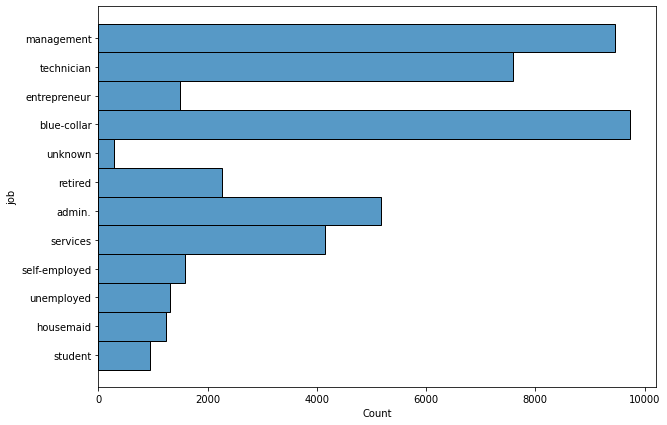

In [14]:
plt.figure(figsize=(10, 7))
sns.histplot(data=bank_df, y="job", palette="pastel")

#**2.Value Counts for All Categorical variables**

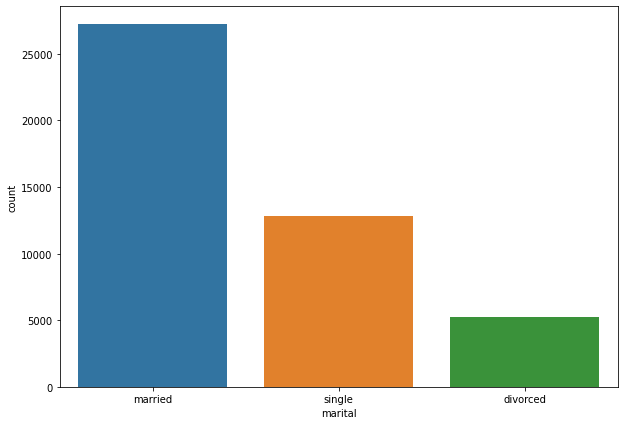

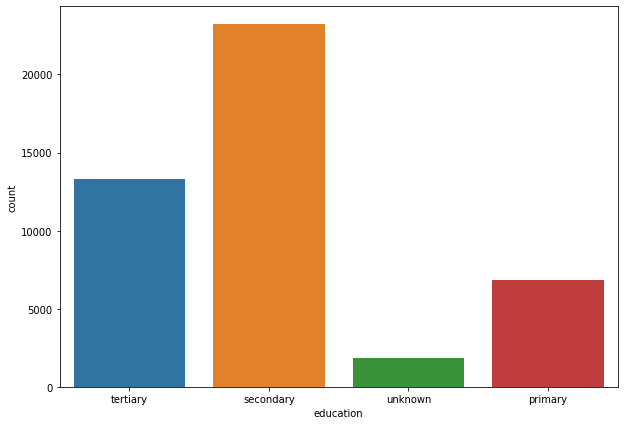

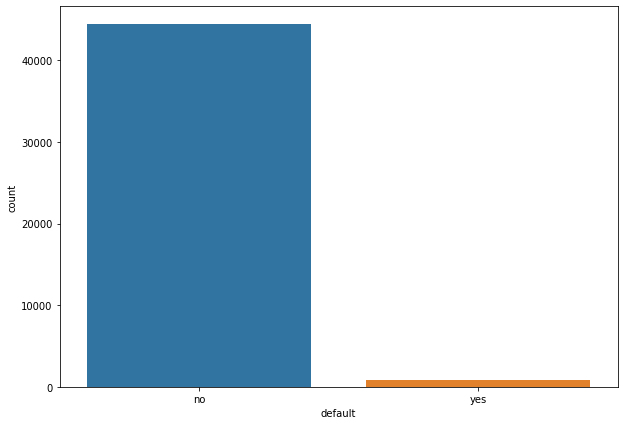

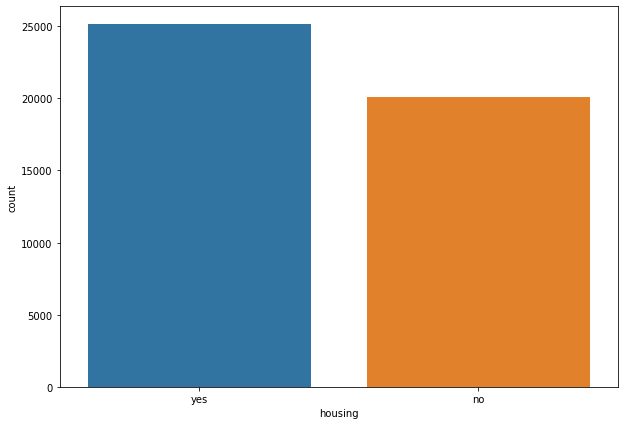

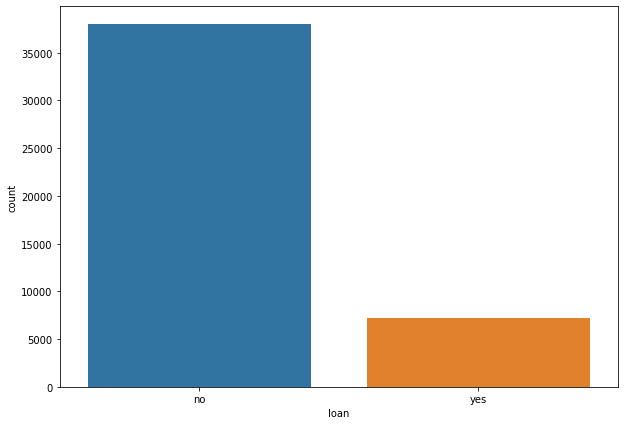

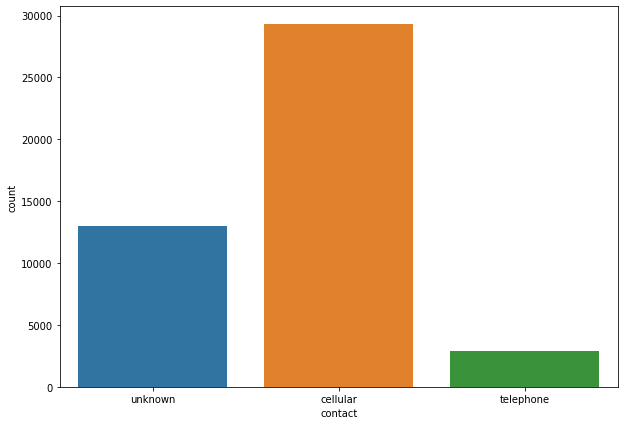

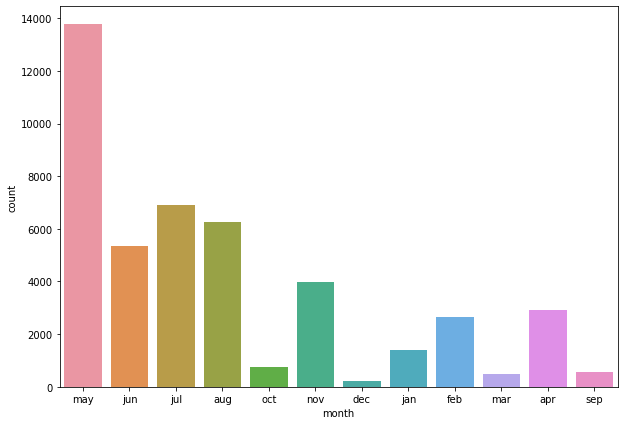

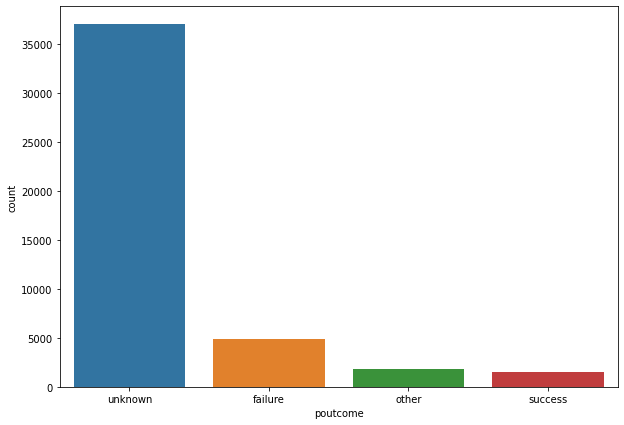

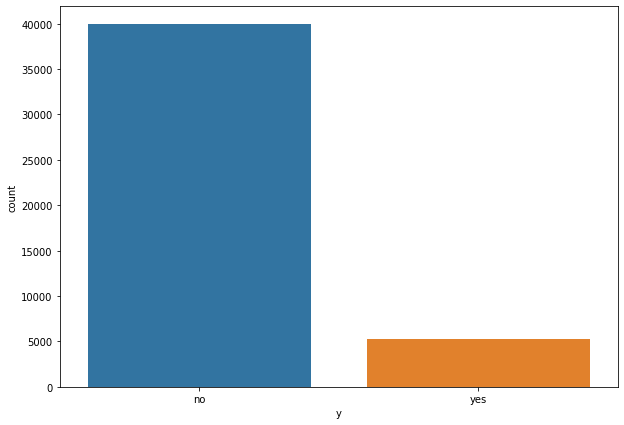

In [15]:
# Value Counts of Categarical Features
for var in categorical[1:]:
  plt.figure(figsize=(10, 7))
  sns.countplot(data=bank_df, x=var)

# **Numarical Features**

# **1. Age**

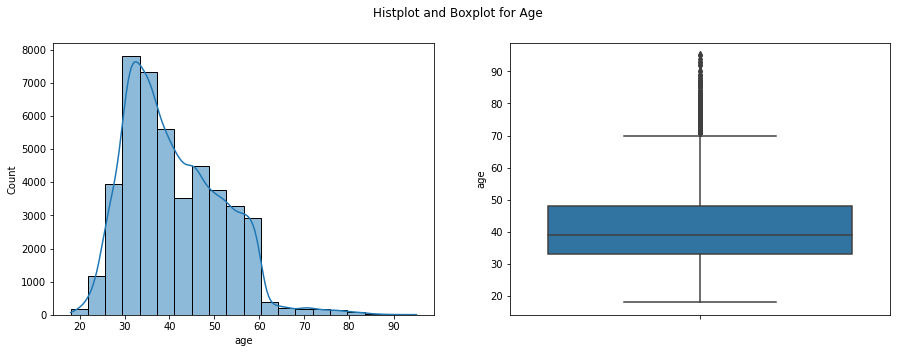

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="age")



In [17]:
# for var in numerical:
#   fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#   fig.suptitle('Histplot and Boxplot for Age')
# # HIstplot
#   sns.histplot(ax=axes[0], data=bank_df, x= var, bins=20,kde=True)
# # BoxPlot
#   sns.boxplot(ax=axes[1],data=bank_df, y= var)


# **2. balance**

In [18]:
print(bank_df.balance.unique().tolist())

[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270, 390, 6, 71, 162, 229, 13, 52, 60, 0, 723, 779, 23, 50, -372, 255, 113, -246, 265, 839, 378, 39, 10635, 63, -7, -3, 506, 2586, 49, 104, 529, 96, -171, -364, 1291, -244, -76, -103, 243, 424, 306, 24, 179, 989, 249, 790, 154, 6530, 100, 59, 1205, 12223, 5935, 25, 282, 1937, 384, 582, 91, 206, 164, 690, 2343, 137, 173, 45, 1270, 16, 486, 152, 290, 54, -37, 101, 383, 81, -674, 90, 128, 151, 61, 30, 523, 31, 79, -34, 448, 144, 351, -67, 262, 56, 26, 3, 41, 7, 105, 818, -16, 2476, 1185, 217, 1685, 802, 94, 517, 947, 42, 37, 57, 22, 8, 293, 348, -19, -4, 18, 139, 1883, 216, 782, 904, 1705, 47, 176, 1225, 86, 82, 271, 1378, 184, 1357, 19, 434, 92, 1151, 51, 214, 1161, 787, 253, 211, 235, 4384, 4080, 53, 2127, 377, 73, 445, 307, 155, 400, 1428, 219, 575, 298, 5699, 257, -390, 330, 195, 301, -41, 483, 28, 965, 324, -69, 205, 278, 1065, 34, 1033, 1467, -12, 388, 294, 1827, 627, 315, 66, -9, 349, 3237, 275, 207, 2248, 428, 140, 297, 279, 901, 2573, 14

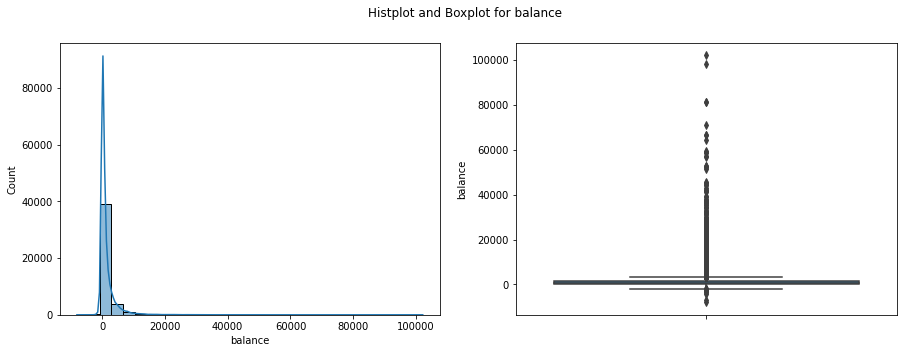

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for balance')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="balance", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="balance")

# **3. Day**

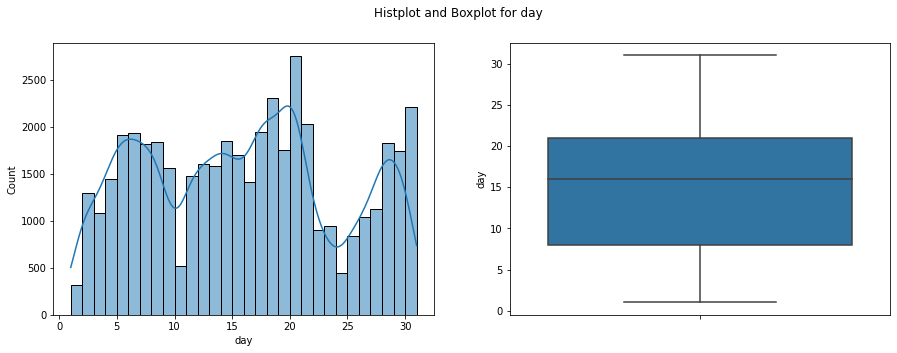

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for day')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="day", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="day")

# **4.Duration**

In [21]:
print(bank_df.duration.unique().tolist())

[261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517, 71, 174, 353, 98, 38, 219, 54, 262, 164, 160, 342, 181, 172, 296, 127, 255, 348, 225, 230, 208, 226, 336, 242, 365, 1666, 577, 180, 22, 1492, 616, 355, 363, 266, 253, 179, 787, 145, 104, 13, 185, 1778, 138, 812, 391, 357, 91, 528, 273, 158, 177, 258, 154, 291, 176, 211, 349, 272, 193, 212, 20, 1042, 246, 529, 1467, 1389, 188, 48, 213, 583, 221, 173, 426, 287, 101, 203, 197, 257, 124, 229, 400, 190, 21, 514, 849, 194, 144, 286, 107, 247, 518, 364, 178, 439, 79, 120, 175, 61, 78, 143, 579, 677, 345, 100, 125, 136, 73, 541, 163, 301, 46, 204, 157, 243, 186, 610, 2033, 85, 114, 57, 238, 93, 128, 303, 558, 270, 228, 99, 240, 673, 233, 1056, 250, 252, 130, 412, 19, 458, 717, 313, 683, 1077, 416, 146, 167, 315, 140, 346, 562, 142, 67, 309, 248, 256, 82, 477, 611, 471, 381, 42, 251, 408, 215, 216, 366, 210, 288, 168, 338, 410, 300, 1419, 27, 18, 730, 746, 121, 40, 206, 389, 702, 117, 232, 39, 282, 714, 227, 119, 361, 350, 332, 113, 

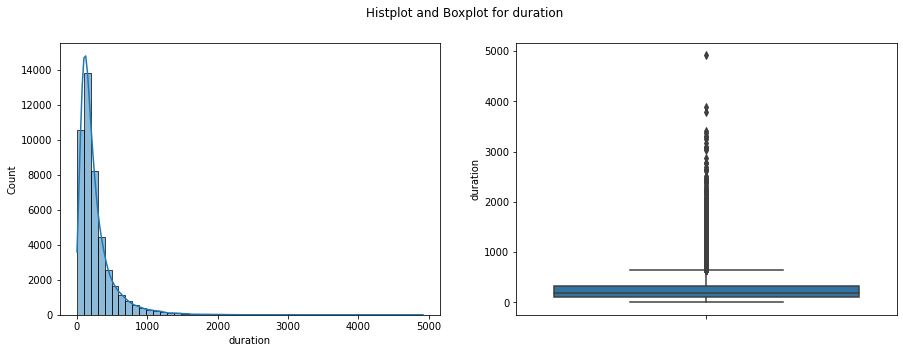

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for duration')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="duration", bins=50,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="duration")

# **5.Campaign**

In [23]:
bank_df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

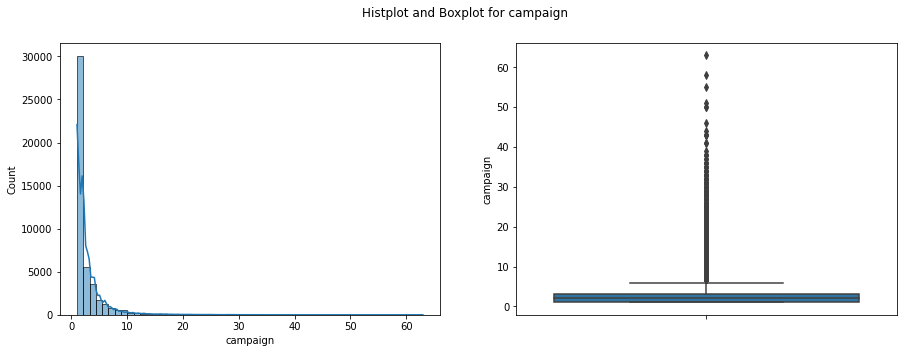

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for campaign')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="campaign", bins=55,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="campaign")

# **6.Pdays**

In [25]:
print(bank_df.pdays.unique().tolist())

[-1, 151, 166, 91, 86, 143, 147, 89, 140, 176, 101, 174, 170, 167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164, 132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152, 96, 103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158, 168, 97, 182, 127, 130, 194, 125, 105, 102, 26, 179, 28, 183, 155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189, 8, 144, 191, 184, 177, 5, 99, 133, 93, 92, 10, 100, 156, 198, 106, 153, 146, 128, 7, 121, 160, 107, 90, 27, 197, 136, 139, 122, 157, 149, 135, 30, 114, 98, 192, 163, 34, 95, 141, 31, 199, 94, 108, 29, 268, 247, 253, 226, 244, 239, 245, 204, 231, 238, 258, 230, 254, 265, 71, 223, 246, 250, 266, 240, 205, 261, 259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227, 206, 224, 249, 235, 228, 263, 2, 270, 232, 252, 207, 200, 269, 233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 221, 202, 216, 201, 257, 229, 210, 217, 75, 213, 73, 76, 267, 211, 215, 77, 236, 82, 6, 209, 274, 1, 243, 212, 275, 80, 276, 9, 2

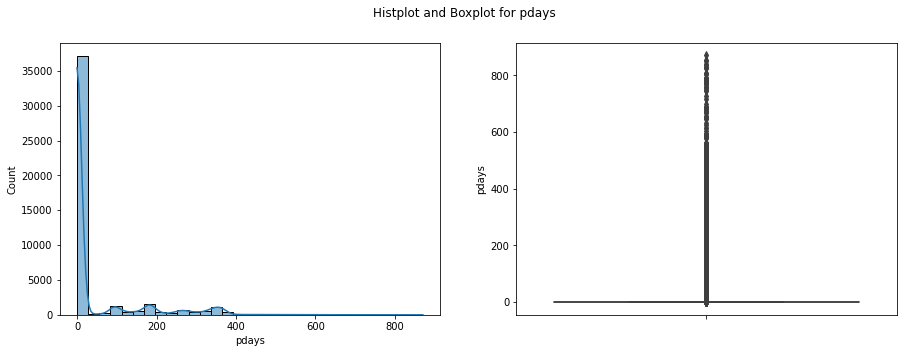

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for pdays')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="pdays", bins=31,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="pdays")

# **7. previous**

In [27]:
print(bank_df.previous.unique().tolist())

[0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9, 21, 8, 14, 15, 26, 37, 13, 25, 20, 27, 17, 23, 38, 29, 24, 51, 275, 22, 19, 30, 58, 28, 32, 40, 55, 35, 41]


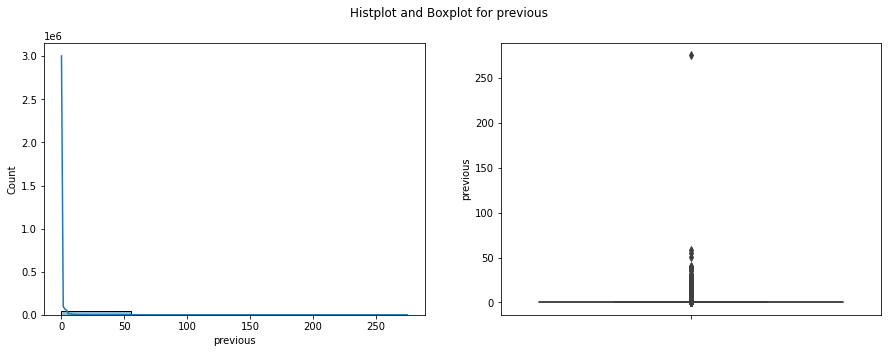

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for previous')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="previous", bins=5,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="previous")

# **Multivariate Analyis**

In [29]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Outcome_y'],
      dtype='object')

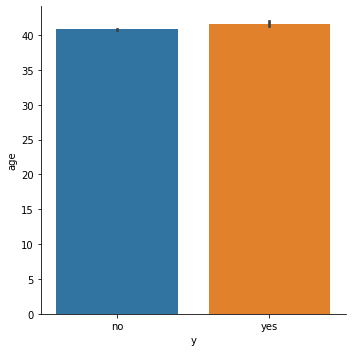

In [30]:
sns.catplot( y="age", x="y",kind="bar",data=bank_df)

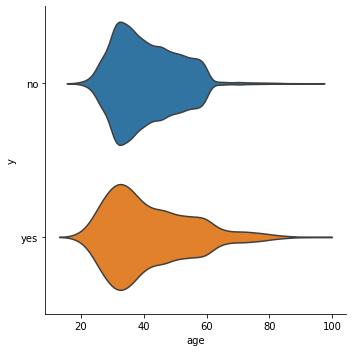

In [31]:
sns.catplot(x="age", y="y", kind="violin", inner=None, data=bank_df)


# **Analsing the Effect of Features on Conversion of Success i.e. (Subscription Of Term Deposit)**

# **1. Type of Job**

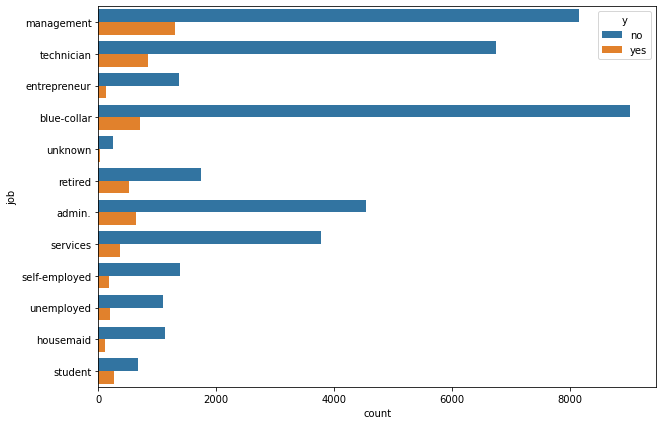

In [32]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.countplot(y = bank_df['job'], hue=bank_df['y'])
plt.show()

In [33]:
x = bank_df.groupby('job').mean().reset_index()
x

job        age      balance        day    duration  campaign  \
0          admin.  39.289886  1135.838909  15.564301  246.896732  2.575324   
1     blue-collar  40.044081  1078.826654  15.442561  262.901562  2.816995   
2    entrepreneur  42.190989  1521.470074  15.702085  256.309348  2.799597   
3       housemaid  46.415323  1392.395161  16.002419  245.825000  2.820968   
4      management  40.449567  1763.616832  16.114189  253.995771  2.864348   
5         retired  61.626767  1984.215106  15.439488  287.361307  2.346731   
6   self-employed  40.484484  1647.970868  16.027866  268.157061  2.853072   
7        services  38.740250   997.088108  15.635532  259.318729  2.718344   
8         student  26.542644  1388.060768  14.897655  246.656716  2.299574   
9      technician  39.314598  1252.632092  16.408582  252.904962  2.906805   
10     unemployed  40.961627  1521.745971  15.498081  288.543361  2.432080   
11        unknown  47.593750  1772.357639  14.642361  237.611111  3.309028   

        pdays  previous  Outcome_y  
0   47.859021  0.671630   0.122027  
1   44.033498  0.505138   0.072750  
2   32.486214  0.478144   0.082717  
3   21.505645  0.371774   0.087903  
4   38.665468  0.668006   0.137556  
5   37.443905  0.638693   0.227915  
6   34.747308  0.551615   0.118429  
7   41.995185  0.501204   0.088830  
8   57.041578  0.953092   0.286780  
9   37.195077  0.574569   0.110570  
10  34.146585  0.466616   0.155027  
11  20.982639  0.319444   0.118056

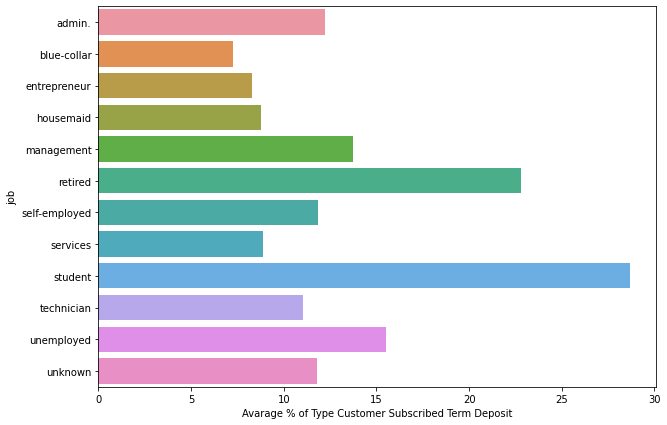

In [34]:
# % of Average Custmer who have subscribed our Product Jobwise
plt.figure(figsize=(10,7))
q=sns.barplot(x=(x.Outcome_y)*100, y = x.job)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

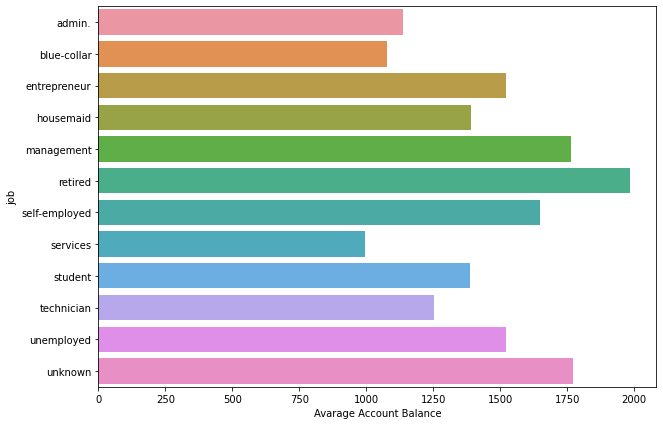

In [35]:
# Avarage  Account Balance of Custmer based on their Job.
plt.figure(figsize=(10,7))
p=sns.barplot(x=x.balance, y = x.job)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **2.Marital Status**

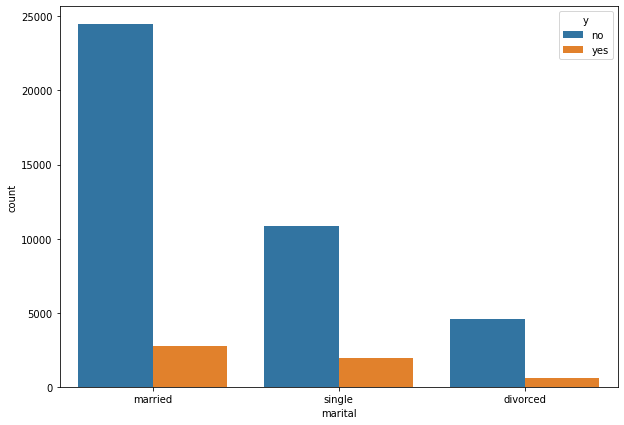

In [36]:
# Customer Subscribed Term Deposit Based on Marital Status
plt.figure(figsize=(10,7))
sns.countplot(bank_df['marital'], hue=bank_df['y'])
plt.show()

In [37]:
x = bank_df.groupby('marital').mean().reset_index()
x

marital        age      balance        day    duration  campaign  \
0  divorced  45.782984  1178.872287  15.796428  262.517188  2.630882   
1   married  43.408099  1425.925590  15.854487  253.412765  2.842875   
2    single  33.703440  1301.497654  15.708210  266.497967  2.649805   

       pdays  previous  Outcome_y  
0  41.001728  0.551373   0.119455  
1  37.950467  0.556552   0.101235  
2  44.652385  0.642690   0.149492

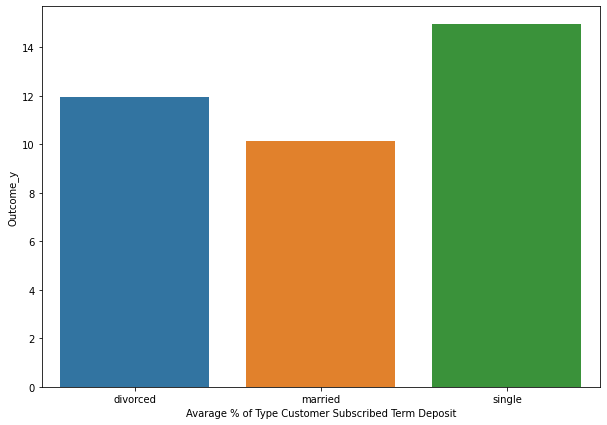

In [38]:
# % of Average Custmer who have subscribed our Product based on Marrital Status
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.marital)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

# **3. Type of Education**

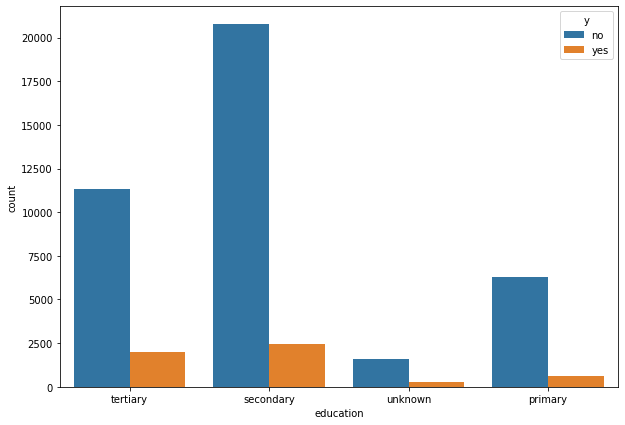

In [39]:
# # Customer Subscribed Term Deposit Based on Education Qualification
plt.figure(figsize=(10,7))
sns.countplot(bank_df['education'], hue=bank_df['y'])
plt.show()

In [40]:
x = bank_df.groupby('education').mean().reset_index()
x

education        age      balance        day    duration  campaign  \
0    primary  45.865567  1250.949934  15.421398  255.933002  2.834331   
1  secondary  39.964270  1154.880786  15.759159  258.685760  2.700802   
2   tertiary  39.593640  1758.416435  16.086535  258.518532  2.825577   
3    unknown  44.510501  1526.754443  15.810985  257.313947  2.849219   

       pdays  previous  Outcome_y  
0  36.081740  0.489272   0.086265  
1  42.353504  0.567753   0.105594  
2  39.024134  0.661980   0.150064  
3  36.856220  0.488422   0.135703

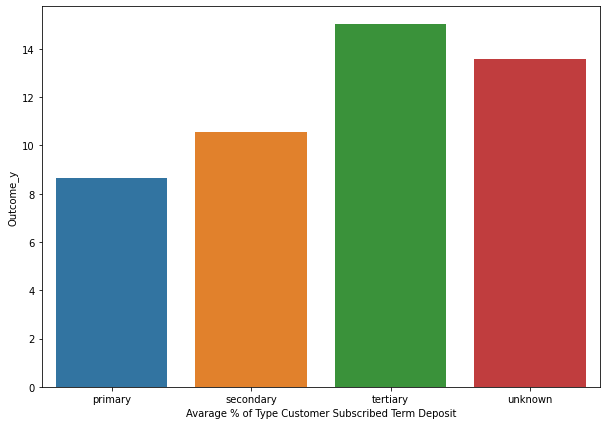

In [41]:
# % of Average Custmer who have subscribed our Product based on education Qualification
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.education)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

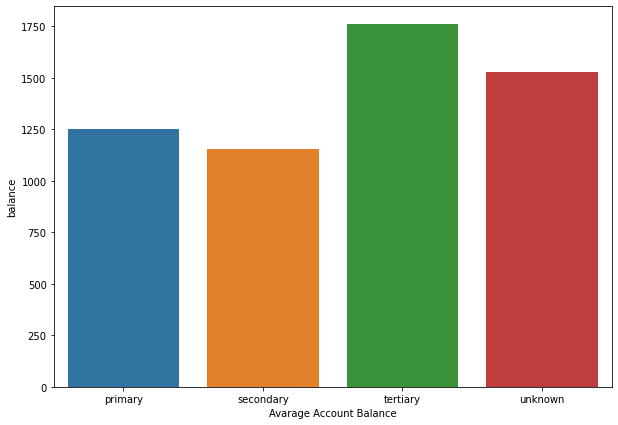

In [42]:
# Avarage  Account Balance of Custmer based on their Educational Qualification.
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.education)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **4. Default In loan Payment**

In [43]:
x = bank_df.groupby('default').mean().reset_index()
x

default        age      balance        day    duration  campaign      pdays  \
0      no  40.961934  1389.806424  15.795792  258.512749  2.756780  40.604536   
1     yes  39.534969  -137.624540  16.385276  239.115337  3.148466  18.042945   

   previous  Outcome_y  
0  0.586044   0.117961  
1  0.268712   0.063804

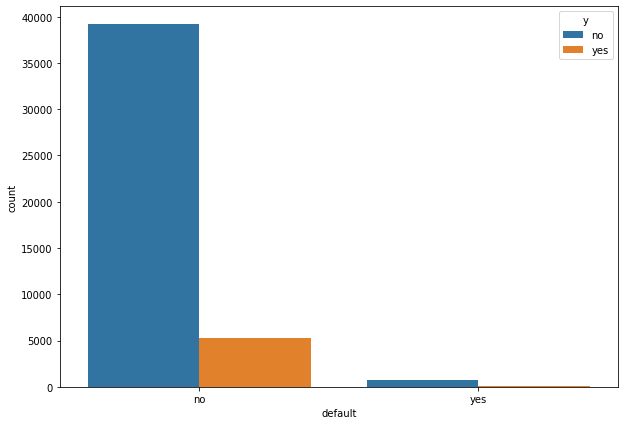

In [44]:
# # Customer Subscribed Term Deposit Based on Loan  default
plt.figure(figsize=(10,7))
sns.countplot(bank_df['default'], hue=bank_df['y'])
plt.show()

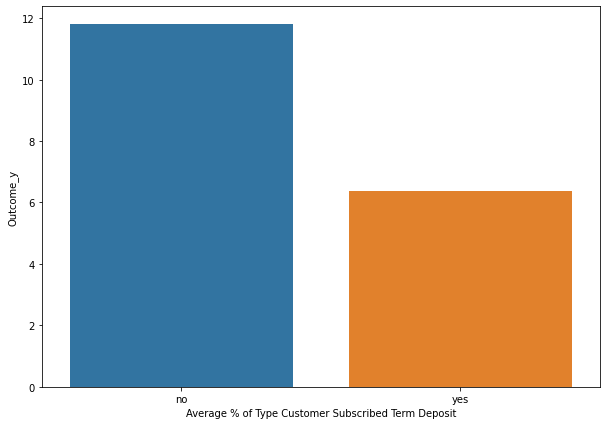

In [45]:
# % of Average Custmer who have subscribed our Product based on default
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.default)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **5. Those Who are having Housing Loan**

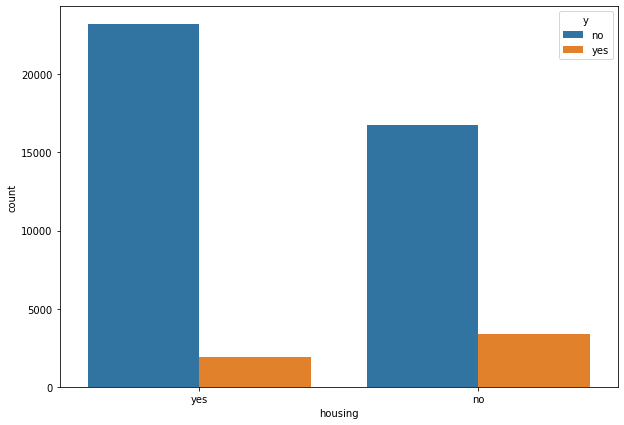

In [46]:
# # Customer Subscribed Term Deposit Based on Housing Loan
plt.figure(figsize=(10,7))
sns.countplot(bank_df['housing'], hue=bank_df['y'])
plt.show()

In [47]:
x = bank_df.groupby('housing').mean().reset_index()
x

housing        age      balance        day    duration  campaign      pdays  \
0      no  43.139883  1596.501270  16.066929  256.700911  2.845625  26.288581   
1     yes  39.175288  1175.103064  15.598249  259.331476  2.698488  51.312495   

   previous  Outcome_y  
0  0.484787   0.167024  
1  0.656665   0.077000

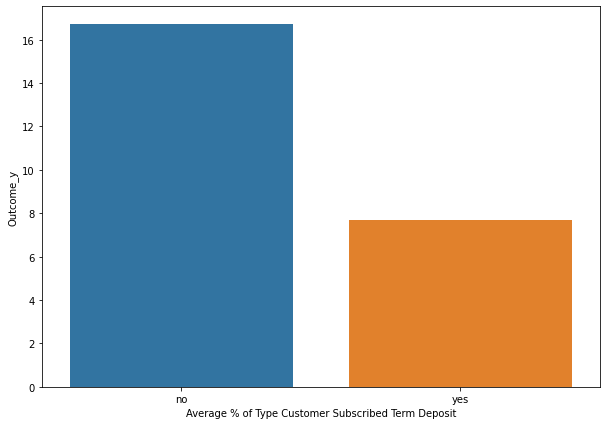

In [48]:
# % of Average Custmer who have subscribed our Product based on housing Loan
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.housing)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **6. Those who are having Personal Loan**

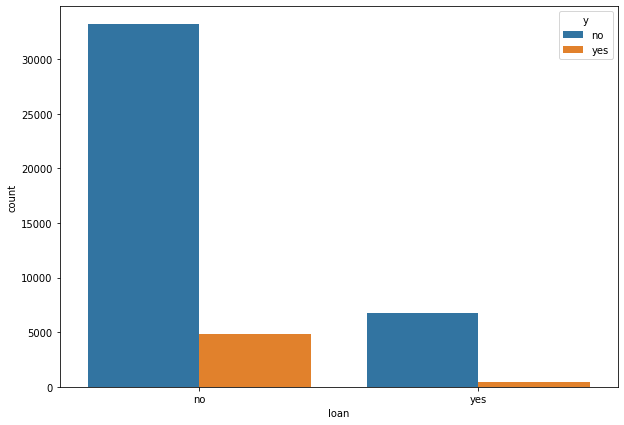

In [49]:
# # Customer Subscribed Term Deposit Based on Personal Loan
plt.figure(figsize=(10,7))
sns.countplot(bank_df['loan'], hue=bank_df['y'])
plt.show()

In [50]:
x = bank_df.groupby('loan').mean().reset_index()
x

loan        age      balance        day    duration  campaign      pdays  \
0   no  41.008823  1474.453631  15.765085  259.559275  2.750336  41.192983   
1  yes  40.555632   774.309912  16.023054  250.845389  2.834622  34.982054   

   previous  Outcome_y  
0  0.591435   0.126557  
1  0.522087   0.066814

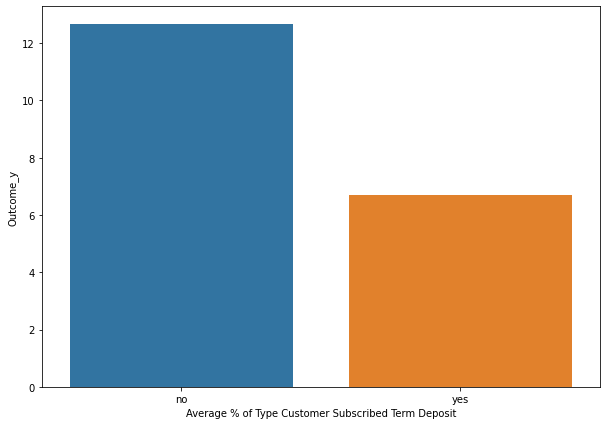

In [51]:
# % of Average Custmer who have subscribed our Product based on Personal Loan
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.loan)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **7. Based On Type on Contact Medium**

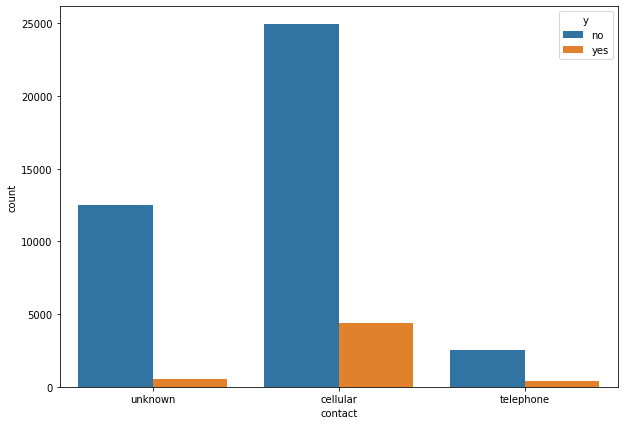

In [52]:
# # Customer Subscribed Term Deposit Based on Type of Contact Medium
plt.figure(figsize=(10,7))
sns.countplot(bank_df['contact'], hue=bank_df['y'])
plt.show()

In [53]:
x = bank_df.groupby('contact').mean().reset_index()
x

contact        age      balance        day    duration  campaign  \
0   cellular  40.400785  1397.926993  15.930306  263.013966  2.690114   
1  telephone  47.837922  1803.704061  16.557467  235.366139  3.400895   
2    unknown  40.600077  1183.550384  15.360138  252.340476  2.787481   

       pdays  previous  Outcome_y  
0  56.885129  0.804064   0.149189  
1  46.312801  0.827254   0.134205  
2   1.299386  0.021966   0.040707

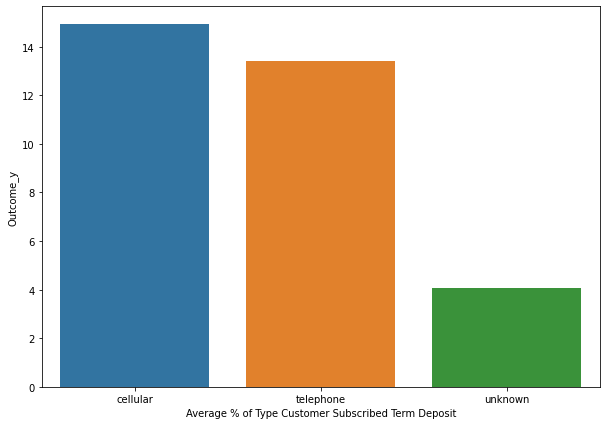

In [54]:
# % of Average Custmer who have subscribed our Product based on Type of contact
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.contact)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **8.Campaign In Month**

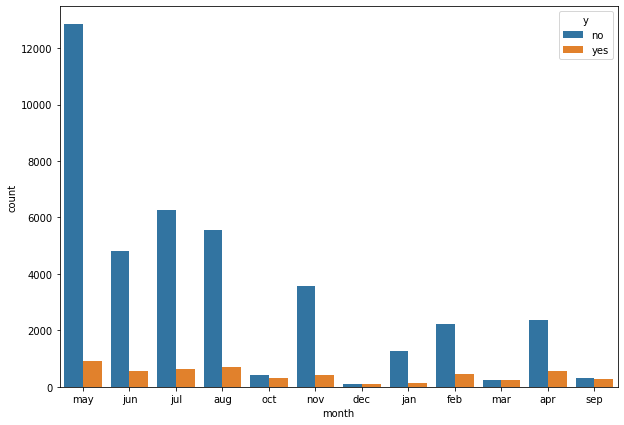

In [55]:
# # Customer Subscribed Term Deposit Based on Month
plt.figure(figsize=(10,7))
sns.countplot(bank_df['month'], hue=bank_df['y'])
plt.show()

In [56]:
x = bank_df.groupby('month').mean().reset_index()


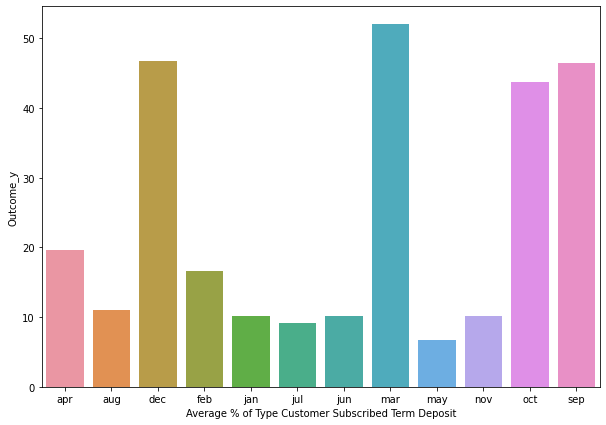

In [57]:
# % of Average Custmer who have subscribed our Product based on campaign in Month
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.month)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **9.Based On Total Call Duration**

In [58]:
x = bank_df.groupby('y').mean().reset_index()
x

y        age      balance        day    duration  campaign      pdays  \
0   no  40.838986  1303.714969  15.892290  221.182806  2.846350  36.421372   
1  yes  41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

   previous  Outcome_y  
0  0.502154        0.0  
1  1.170354        1.0

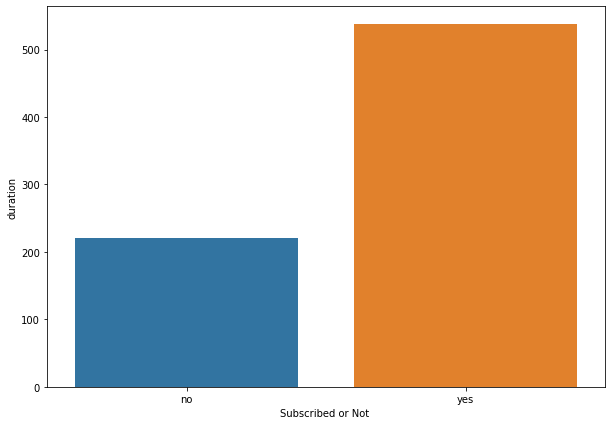

In [59]:
# % of Average Custmer who have subscribed our Product based on Call Duration in campaign
plt.figure(figsize=(10,7))
q=sns.barplot(x=x.y, y = x.duration)
q.set_xlabel("Subscribed or Not ")
plt.show()

## **We see that the feature ‘duration’, which tells us about the duration of the last call in seconds, is more than twice for the customers who bought the products than for customers who didn’t. ‘Campaign’, which denotes the number of calls made during the current campaign, are lower for customers who purchased the products.**

# **10.Outcome of previous campaign**

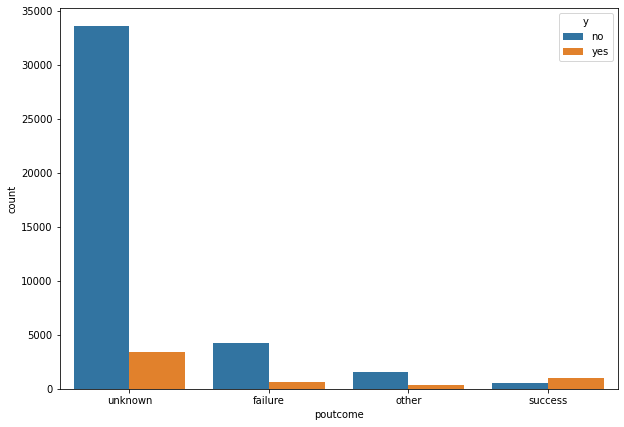

In [60]:
# Custmer who have subscribed our Product based on poutcome of previous campaign 
plt.figure(figsize=(10,7))
sns.countplot(bank_df['poutcome'], hue=bank_df['y'])
plt.show()

In [61]:
x = bank_df.groupby('poutcome').mean().reset_index()
x

poutcome        age      balance        day    duration  campaign  \
0  failure  40.786166  1465.805550  14.166701  244.185880  1.980820   
1    other  39.752174  1487.411413  14.475000  255.715217  2.461413   
2  success  42.964924  1939.301125  14.449371  316.868961  1.806089   
3  unknown  40.932114  1318.722043  16.145621  257.738332  2.921886   

        pdays  previous  Outcome_y  
0  241.509284  2.896552   0.126097  
1  229.683696  4.009239   0.166848  
2  163.259431  3.075447   0.647253  
3   -0.962039  0.000460   0.091615

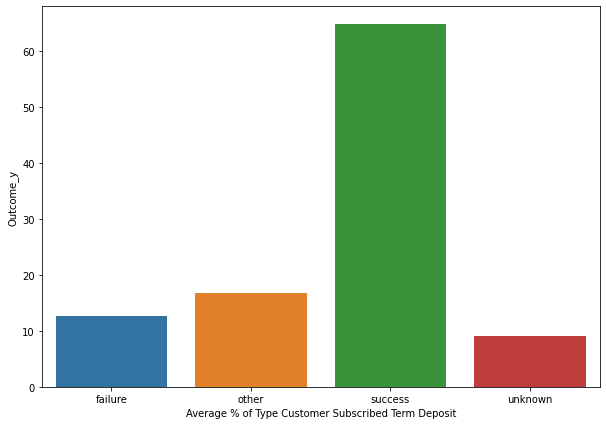

In [62]:
# % of Average Custmer who have subscribed our Product based on poutcome of previous campaign
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.poutcome)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **11.No of Call in Current Campaign**

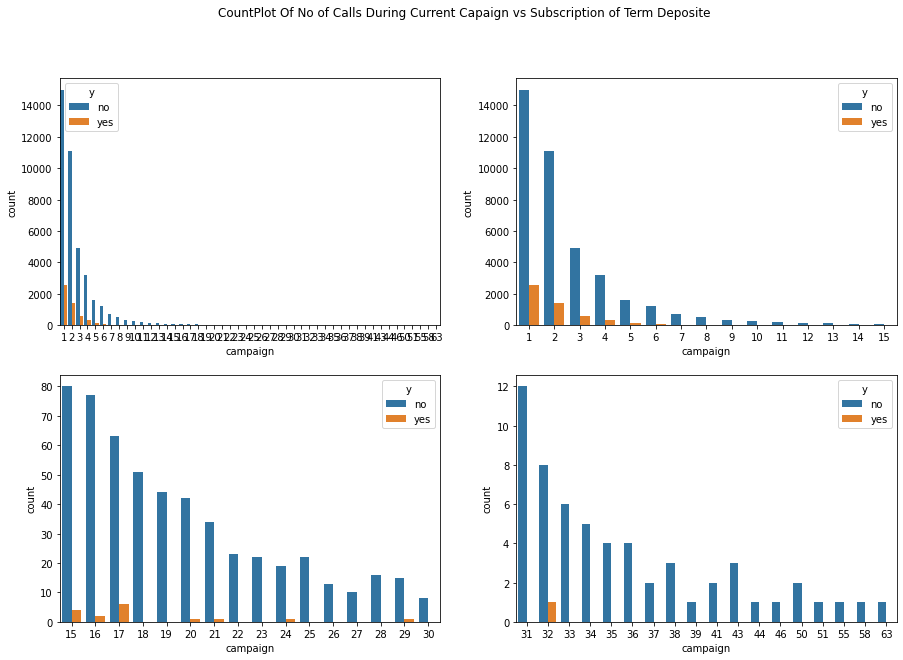

In [63]:
# Finding Relation between No of Call in Current compaign Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of No of Calls During Current Capaign vs Subscription of Term Deposite')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="campaign",hue='y')
# Countplot for less than 15 calls during campaign
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['campaign']<=15].campaign,hue='y')
# Countplot for between 15 to 30 calls during campaign
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df.campaign >= 15) & (bank_df.campaign <= 30)].campaign,hue='y')
# # Countplot formore trhan 30 calls during campaign
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['campaign']>30].campaign,hue='y')

# **12.No of Call in Previous Campaign**

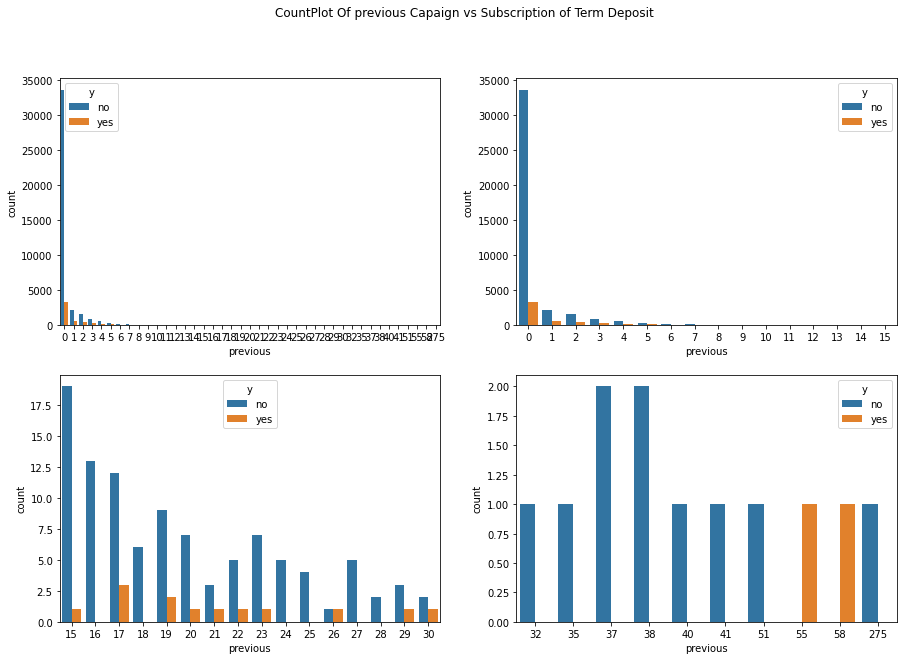

In [64]:
# Finding Relation between No of Call in previous compaign Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of previous Capaign vs Subscription of Term Deposit')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="previous",hue='y')
# Countplot for less than 15 calls during previous campaign
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['previous']<=15].previous,hue='y')
# Countplot for between 15 to 30 calls during  previous campaign
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df.previous >= 15) & (bank_df.previous <= 30)].previous,hue='y')
# # Countplot formore trhan 30 calls during previous campaign
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['previous']>30].previous,hue='y')

# **13. Date of Month Last time called Customer**

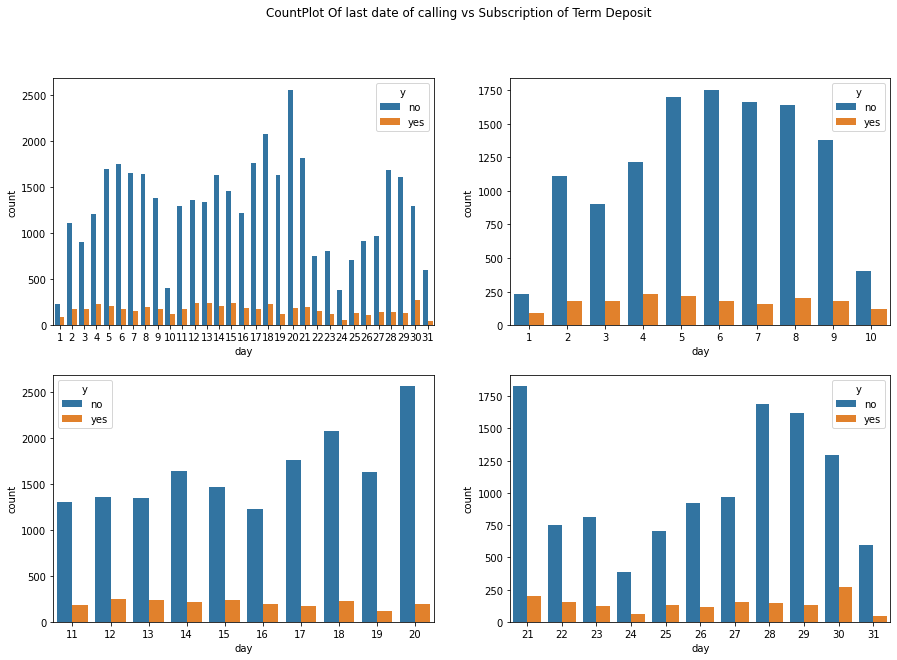

In [65]:
# Finding Relation between last date of calling Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of last date of calling vs Subscription of Term Deposit')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="day",hue='y')
# Countplot for less than 10 days of month   
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['day']<=10].day,hue='y')
# Countplot for 11 to 20 days of month   
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df['day']>10) & (bank_df['day']<=20)].day,hue='y')
# Countplot for more that 20 days of month   
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['day']>20].day,hue='y')

# **14.Based on Age Group**

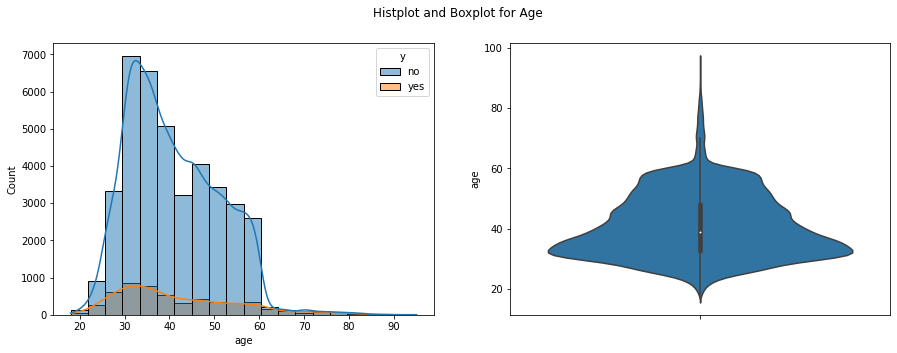

In [66]:
## Finding Relation between Age and Subscription of Term Deposit
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age",hue='y', bins=20,kde=True)
# BoxPlot
sns.violinplot(ax=axes[1],data=bank_df, y="age",hue='y',showmeans=True,showmedians=True)

In [67]:
#add a new column category next to the age group. 
category = pd.cut(bank_df.age,bins=[15,30,50,70,100],labels=['young','Adult','Upper_Middle','Elderly'])
bank_df.insert(2,'Age_Group',category)


In [68]:
x = bank_df.groupby('Age_Group').mean().reset_index()
x

Age_Group        age      balance        day    duration  campaign  \
0         young  27.462162  1019.952774  15.766287  273.296159  2.556046   
1         Adult  39.053827  1286.708014  15.829323  254.324414  2.829773   
2  Upper_Middle  55.956661  1799.680999  15.795164  254.647468  2.747833   
3       Elderly  76.815195  2916.827515  15.227926  331.010267  2.135524   

       pdays  previous  Outcome_y  
0  41.216501  0.563158   0.162873  
1  41.632822  0.589435   0.097870  
2  33.637888  0.528855   0.124886  
3  58.365503  1.213552   0.447639

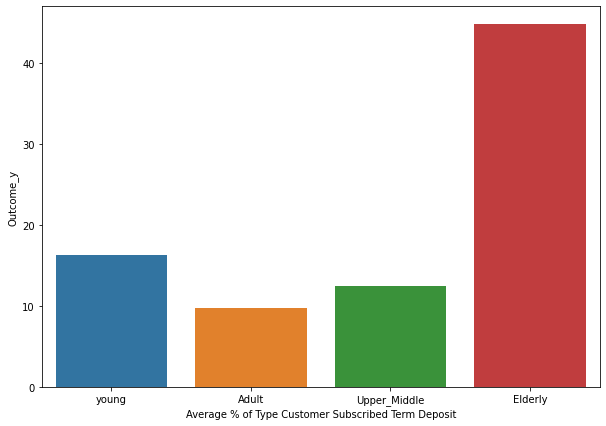

In [69]:
# % of Average Custmer who have subscribed our Product based on Age_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.Age_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

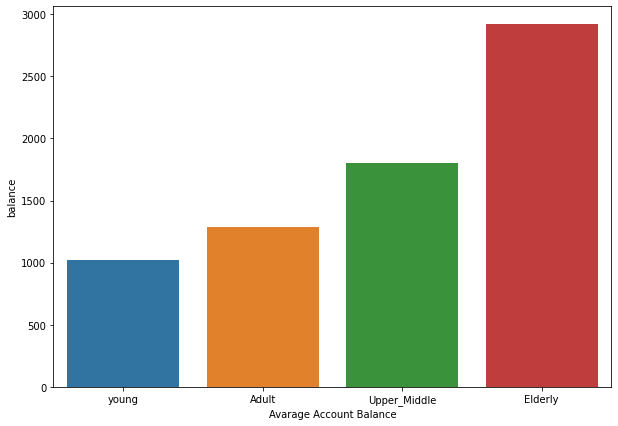

In [70]:
# Avarage  Account Balance of Custmer based on their Age Group
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.Age_Group)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **15. Based on the Account Balance**

Text(0.5, 0, 'Customer whose Account balance More than 20000$')

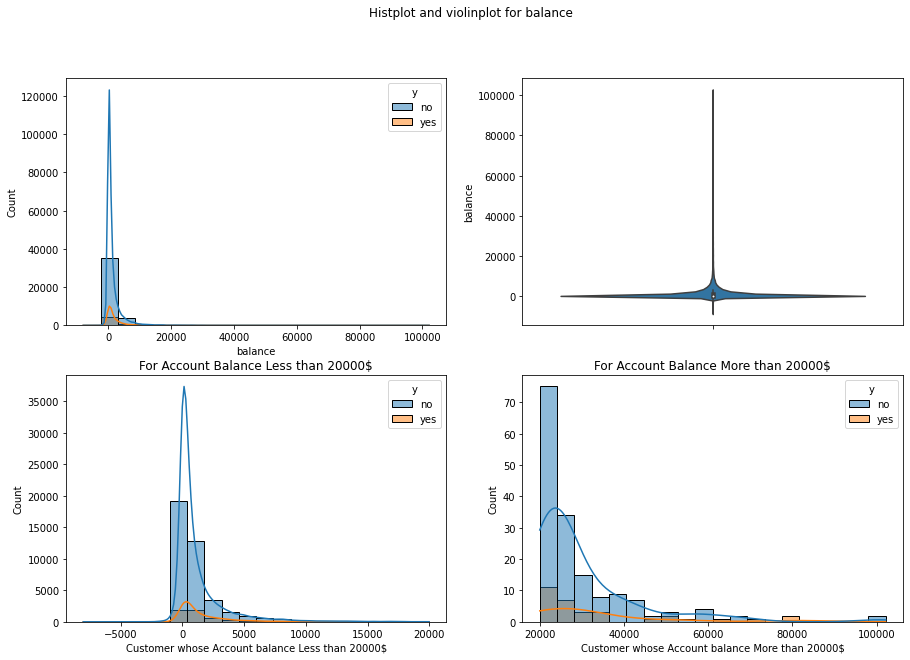

In [71]:
## Finding Relation between balance and Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histplot and violinplot for balance')
# Histplot
sns.histplot(ax=axes[0,0], data=bank_df, x="balance",hue='y', bins=20,kde=True)
# violinplot
sns.violinplot(ax=axes[0,1],data=bank_df, y="balance",hue='y',showmeans=True,showmedians=True)
# Histplot  
p=sns.histplot(ax=axes[1,0], data=bank_df, x=bank_df[bank_df['balance']<20000].balance,hue='y',bins=20,kde=True)
p.set_title('For Account Balance Less than 20000$')
p.set_xlabel('Customer whose Account balance Less than 20000$')
# Histplot   
q=sns.histplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['balance']>20000].balance,hue='y',bins=20,kde=True)
q.set_title('For Account Balance More than 20000$')
q.set_xlabel('Customer whose Account balance More than 20000$')

In [72]:
#add a new column category next to the Balance group. 
category = pd.cut(bank_df.balance,bins=[-10000,0,5000,10000,20000,40000,60000,80000,200000],labels=['Negative','0to5k','5kto10k','10to20k','20kto40k' ,'40kyo60k','60kto80k','morethan80k'])
bank_df.insert(7,'bal_Group',category)

In [73]:
x = bank_df.groupby('bal_Group').mean().reset_index()
x

bal_Group        age       balance        day    duration  campaign  \
0     Negative  40.681868   -164.337088  16.382830  249.220604  2.999863   
1        0to5k  40.766545    992.725703  15.663056  258.568261  2.722767   
2      5kto10k  43.511905   6802.498512  16.158730  282.481151  2.684524   
3      10to20k  43.371069  13222.234277  15.915094  263.555031  2.575472   
4     20kto40k  45.321212  25532.503030  16.806061  249.806061  2.660606   
5     40kyo60k  49.050000  49369.200000  12.300000  246.650000  3.950000   
6     60kto80k  56.750000  67226.250000   8.500000  200.250000  2.500000   
7  morethan80k  69.500000  90738.000000  13.000000  326.000000  2.000000   

        pdays  previous  Outcome_y  
0   30.930357  0.399176   0.068956  
1   42.142507  0.609331   0.123867  
2   40.640873  0.707837   0.151786  
3   39.644654  0.679245   0.166667  
4   35.648485  0.527273   0.145455  
5    8.500000  0.050000   0.150000  
6   -1.000000  0.000000   0.000000  
7  101.250000  1.250000   0.500000

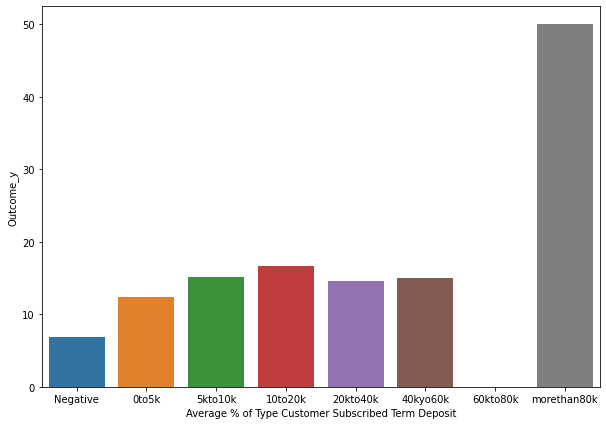

In [74]:
# % of Average Custmer who have subscribed our Product based on bal_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.bal_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

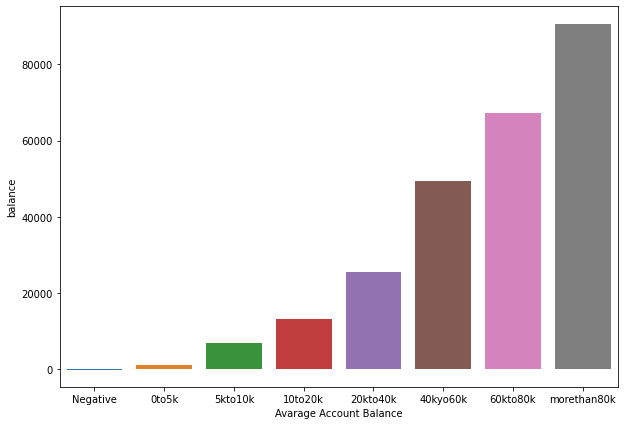

In [75]:
# Avarage  Account Balance of Custmer based on their bal_Group 
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.bal_Group)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **16.Based on Since No Days last Call to Customer**

Text(0.5, 0, 'More Than 365 Days No last Call to Customer')

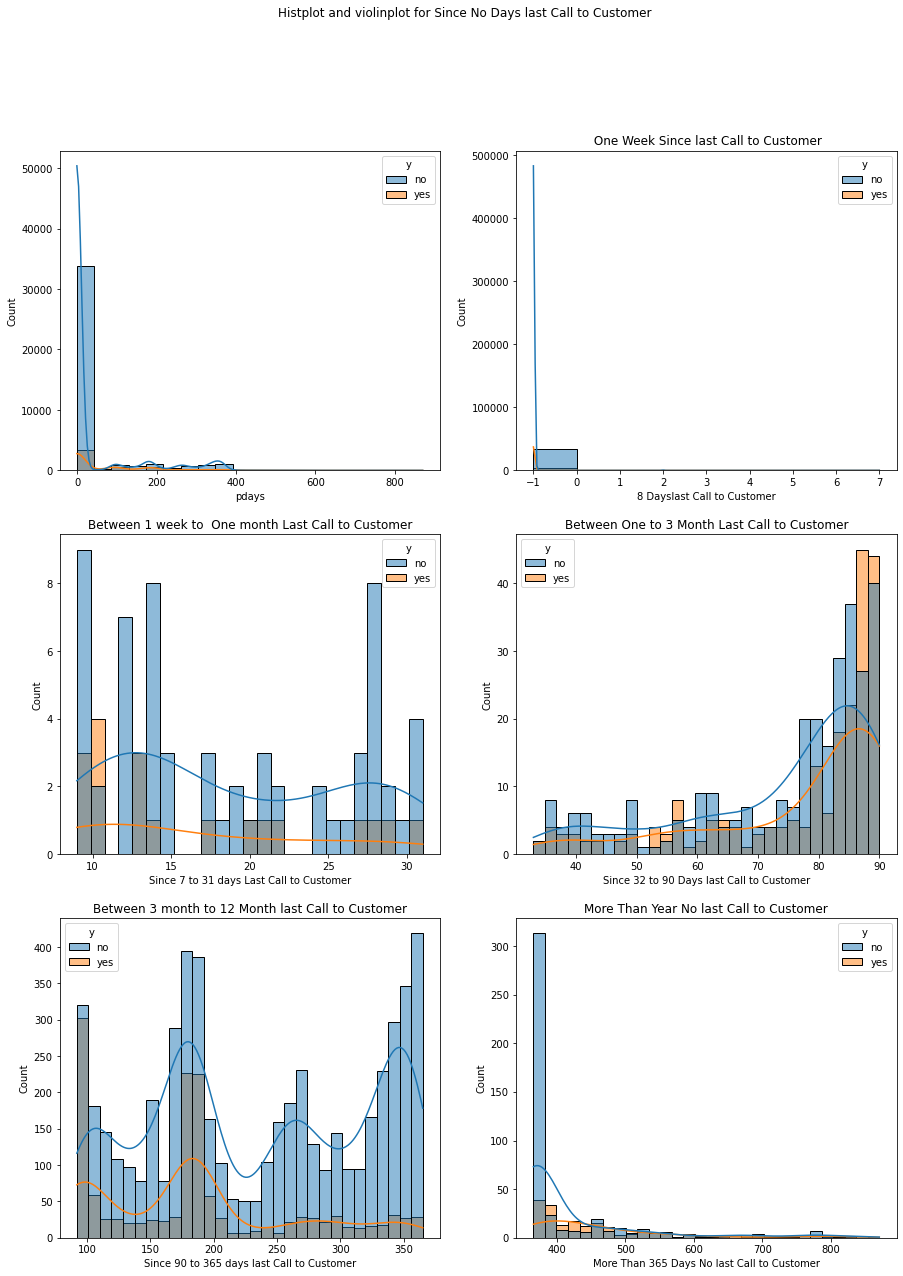

In [76]:
## Finding Relation Based on Since No Days last Call to Customer and Subscription of Term Deposit
fig, axes = plt.subplots(3, 2, figsize=(15,20))
fig.suptitle('Histplot and violinplot for Since No Days last Call to Customer')
# Histplot
sns.histplot(ax=axes[0,0], data=bank_df, x="pdays",hue='y', bins=20,kde=True)
# Histplot  
p=sns.histplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['pdays']<8].pdays,hue='y',bins=8,kde=True)
p.set_title(' One Week Since last Call to Customer')
p.set_xlabel('8 Dayslast Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df['pdays']>8) & (bank_df['pdays']<=31)].pdays,hue='y',bins=25,kde=True)
p.set_title('Between 1 week to  One month Last Call to Customer')
p.set_xlabel('Since 7 to 31 days Last Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[1,1], data=bank_df, x=bank_df[(bank_df['pdays']>32) & (bank_df['pdays']<=90)].pdays,hue='y',bins=30,kde=True)
p.set_title('Between One to 3 Month Last Call to Customer')
p.set_xlabel('Since 32 to 90 Days last Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[2,0], data=bank_df, x=bank_df[(bank_df['pdays']>91) & (bank_df['pdays']<=365)].pdays,hue='y',bins=30,kde=True)
p.set_title('Between 3 month to 12 Month last Call to Customer')
p.set_xlabel('Since 90 to 365 days last Call to Customer')
# Histplot   
q=sns.histplot(ax=axes[2,1], data=bank_df, x=bank_df[bank_df['pdays']>365].pdays,hue='y',bins=30,kde=True)
q.set_title('More Than Year No last Call to Customer')
q.set_xlabel('More Than 365 Days No last Call to Customer')

In [77]:
#add a new column category next to the Balance group. 
category = pd.cut(bank_df.pdays,bins=[-1,8,30,60,90,180,270,365,1000],labels=['Week','Month','2Month','3rdMonth','2ndQuarter' ,'3rdQuarter','4thQuarter','morethanYear'])
bank_df.insert(16,'LastCall_Group',category)

In [78]:
x = bank_df.groupby('LastCall_Group').mean().reset_index()
x

LastCall_Group        age      balance        day    duration  campaign  \
0           Week  43.037037   711.601852  13.305556  211.879630  2.212963   
1          Month  39.737500   868.300000  13.787500  300.125000  2.225000   
2         2Month  42.273585  2611.754717  14.500000  266.424528  1.679245   
3       3rdMonth  42.134434  1981.412736  14.709906  283.275943  1.721698   
4     2ndQuarter  41.623387  2043.515726  15.210887  259.085484  1.985887   
5     3rdQuarter  42.582133  1570.208934  15.213737  264.723343  2.045149   
6     4thQuarter  38.553556  1031.345330  12.609683  255.110540  2.194516   
7   morethanYear  40.608087  1318.231726  13.752722  254.188180  2.096423   

        pdays  previous  Outcome_y  
0    4.296296  2.953704   0.092593  
1   17.387500  3.475000   0.225000  
2   45.971698  3.405660   0.377358  
3   81.997642  3.436321   0.431604  
4  130.528629  3.264919   0.274194  
5  213.395773  3.331412   0.263689  
6  328.774636  3.038560   0.101542  
7  431.542768  2.639191   0.292379

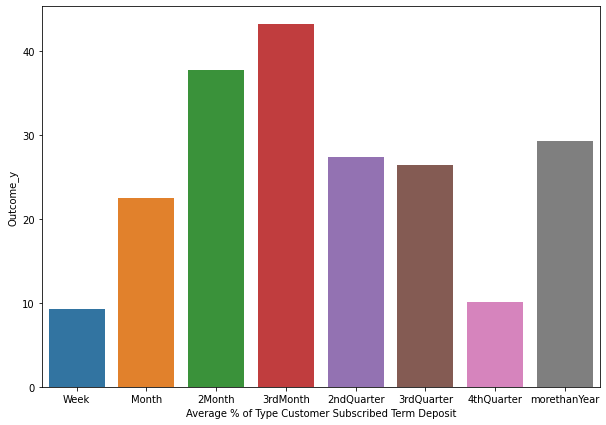

In [79]:
# % of Average Custmer who have subscribed our Product based on LastCall_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.LastCall_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()


# **Handling NaN/ Null/ Missing Values and Outliers if Any**

In [80]:
bank_df2 = bank_df.copy()

In [81]:
bank_df2.drop('y',axis=1,inplace =True)

## **1. Handling NaN/Null/Missing Value in dataset**

In [82]:
bank_df2.isnull().sum()

age                   0
job                   0
Age_Group             0
marital               0
education             0
default               0
balance               0
bal_Group             0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
LastCall_Group    36954
previous              0
poutcome              0
Outcome_y             0
dtype: int64

In [83]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45211 non-null  int64   
 1   job             45211 non-null  object  
 2   Age_Group       45211 non-null  category
 3   marital         45211 non-null  object  
 4   education       45211 non-null  object  
 5   default         45211 non-null  object  
 6   balance         45211 non-null  int64   
 7   bal_Group       45211 non-null  category
 8   housing         45211 non-null  object  
 9   loan            45211 non-null  object  
 10  contact         45211 non-null  object  
 11  day             45211 non-null  int64   
 12  month           45211 non-null  object  
 13  duration        45211 non-null  int64   
 14  campaign        45211 non-null  int64   
 15  pdays           45211 non-null  int64   
 16  LastCall_Group  8257 non-null   category
 17  previous    

## **SO there is no Null /NaN or Any missing Value in the above dataset**

## **2. Handling Outliers In Dataset**

In [84]:
bank_df2.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous     Outcome_y  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

In [85]:
bank_df2.describe(include='all')

age          job Age_Group  marital  education default  \
count   45211.000000        45211     45211    45211      45211   45211   
unique           NaN           12         4        3          4       2   
top              NaN  blue-collar     Adult  married  secondary      no   
freq             NaN         9732     28926    27214      23202   44396   
mean       40.936210          NaN       NaN      NaN        NaN     NaN   
std        10.618762          NaN       NaN      NaN        NaN     NaN   
min        18.000000          NaN       NaN      NaN        NaN     NaN   
25%        33.000000          NaN       NaN      NaN        NaN     NaN   
50%        39.000000          NaN       NaN      NaN        NaN     NaN   
75%        48.000000          NaN       NaN      NaN        NaN     NaN   
max        95.000000          NaN       NaN      NaN        NaN     NaN   

              balance bal_Group housing   loan   contact           day  month  \
count    45211.000000     45211   45211  45211     45211  45211.000000  45211   
unique            NaN         8       2      2         3           NaN     12   
top               NaN     0to5k     yes     no  cellular           NaN    may   
freq              NaN     35086   25130  37967     29285           NaN  13766   
mean      1362.272058       NaN     NaN    NaN       NaN     15.806419    NaN   
std       3044.765829       NaN     NaN    NaN       NaN      8.322476    NaN   
min      -8019.000000       NaN     NaN    NaN       NaN      1.000000    NaN   
25%         72.000000       NaN     NaN    NaN       NaN      8.000000    NaN   
50%        448.000000       NaN     NaN    NaN       NaN     16.000000    NaN   
75%       1428.000000       NaN     NaN    NaN       NaN     21.000000    NaN   
max     102127.000000       NaN     NaN    NaN       NaN     31.000000    NaN   

            duration      campaign         pdays LastCall_Group      previous  \
count   45211.000000  45211.000000  45211.000000           8257  45211.000000   
unique           NaN           NaN           NaN              8           NaN   
top              NaN           NaN           NaN     2ndQuarter           NaN   
freq             NaN           NaN           NaN           2480           NaN   
mean      258.163080      2.763841     40.197828            NaN      0.580323   
std       257.527812      3.098021    100.128746            NaN      2.303441   
min         0.000000      1.000000     -1.000000            NaN      0.000000   
25%       103.000000      1.000000     -1.000000            NaN      0.000000   
50%       180.000000      2.000000     -1.000000            NaN      0.000000   
75%       319.000000      3.000000     -1.000000            NaN      0.000000   
max      4918.000000     63.000000    871.000000            NaN    275.000000   

       poutcome     Outcome_y  
count     45211  45211.000000  
unique        4           NaN  
top     unknown           NaN  
freq      36959           NaN  
mean        NaN      0.116985  
std         NaN      0.321406  
min         NaN      0.000000  
25%         NaN      0.000000  
50%         NaN      0.000000  
75%         NaN      0.000000  
max         NaN      1.000000

## **1.Handling Outliers In Feature Age**

Text(0.5, 1.0, ' Success of Previous Subscription')

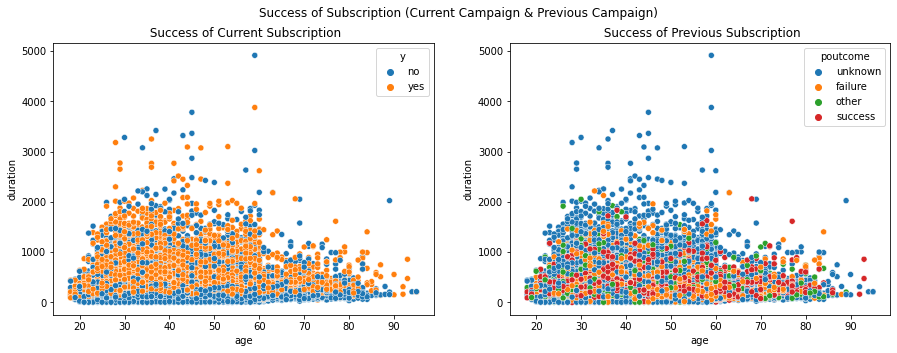

In [86]:
# Corelation Between Age & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['age'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['age'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

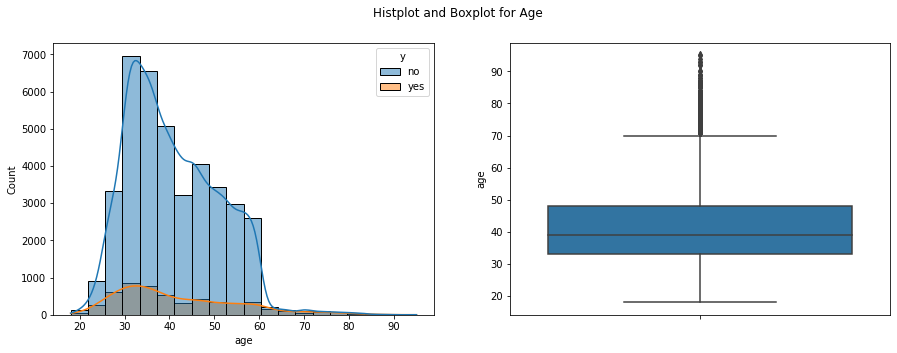

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age", bins=20,kde=True,hue=bank_df['y'])
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="age")

**So In case of Feature Age Although Age is Showing Outliers to all customer who are having approximately age above 70 years, but we know that age above 70 is not outliers but its variance or spred of data, and custmer above age 70 are very important for us because they are the one who can have maximum possibility to subscribe our Term Deposit which is visible in histoplot also and in above multivariate aanalysis as well so that why we will not be removing that data.**

## **2.Handling Outliers In Feature Balance**

Text(0.5, 1.0, ' Success of Previous Subscription')

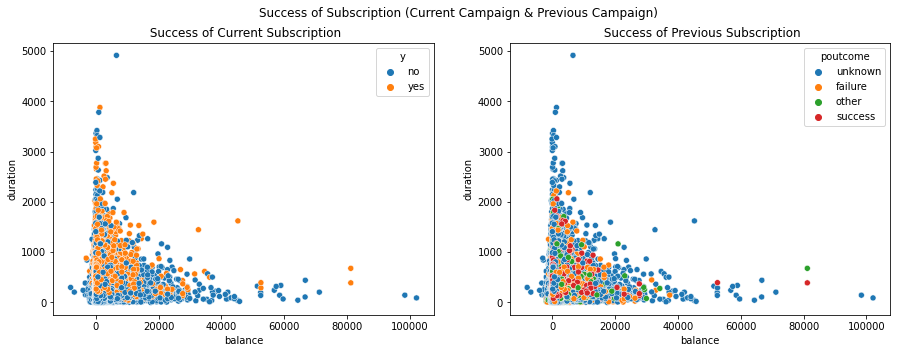

In [88]:
# Corelation Between balance & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['balance'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['balance'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [89]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  balance= bank_df['balance'].values
  balance= np.sort(balance, axis= None)
  print("{} percentile value is {}".format(i, balance[int(len(balance)*(float(i)/100))]))
print("100 percentile value is ",balance[-1])

0 percentile value is -8019
10 percentile value is 0
20 percentile value is 22
30 percentile value is 131
40 percentile value is 272
50 percentile value is 448
60 percentile value is 701
70 percentile value is 1126
80 percentile value is 1859
90 percentile value is 3574
100 percentile value is  102127


In [90]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  balance= bank_df['balance'].values
  balance= np.sort(balance, axis= None)
  print("{} percentile value is {}".format(i, balance[int(len(balance)*(float(i)/100))]))
print("100 percentile value is ",balance[-1])

90 percentile value is 3574
91 percentile value is 3867
92 percentile value is 4262
93 percentile value is 4688
94 percentile value is 5137
95 percentile value is 5768
96 percentile value is 6573
97 percentile value is 7780
98 percentile value is 9444
99 percentile value is 13165
100 percentile value is  102127


In [91]:
# Lets Cap Outliers @ Balance 40000 
bank_df = bank_df[bank_df.balance <= 40000]
bank_df = bank_df[bank_df.balance >= -1000]

Text(0.5, 1.0, 'After Removal of Outliers')

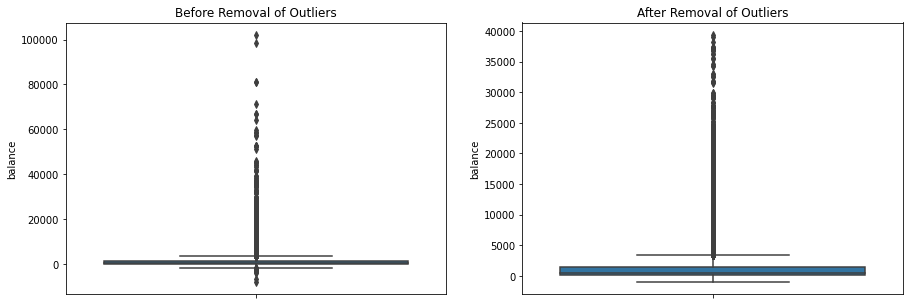

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="balance")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="balance")
p.set_title('After Removal of Outliers')

In [93]:
# Bank_df Actual data(45211, 17)
bank_df.shape

(45039, 21)

## **3.Handling Outliers In Feature campaign**

Text(0.5, 1.0, ' Success of Previous Subscription')

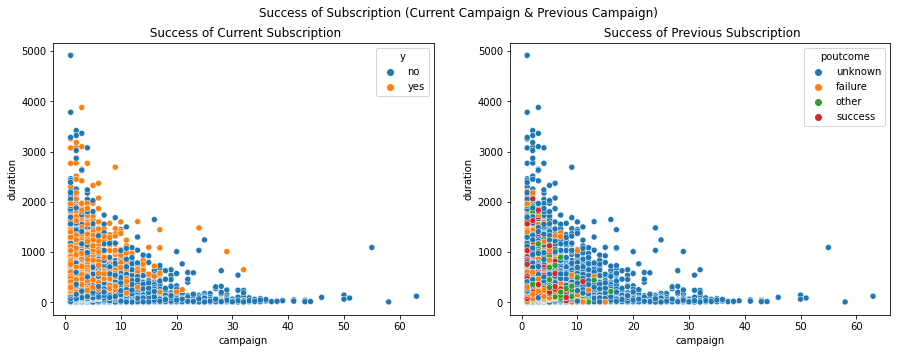

In [94]:
# Corelation Between campaign & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['campaign'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['campaign'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [95]:
# Lets Cap Outliers @ campaign 32
bank_df = bank_df[bank_df.campaign <= 32]


Text(0.5, 1.0, 'After Removal of Outliers')

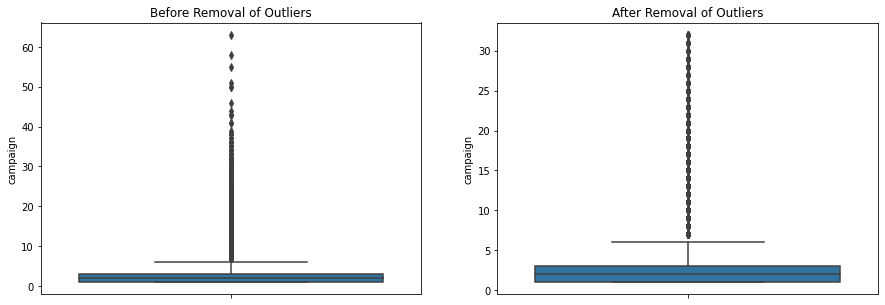

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="campaign")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="campaign")
p.set_title('After Removal of Outliers')

In [97]:
bank_df.shape

(45001, 21)

## **4.Handling Outliers In Feature previous**

Text(0.5, 1.0, ' Success of Previous Subscription')

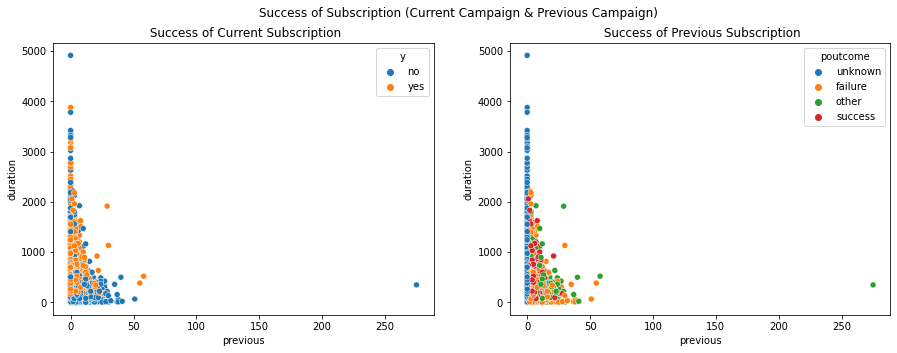

In [98]:
# Corelation Between previous & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['previous'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['previous'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [99]:
# Lets Cap Outliers @ previous 30
bank_df = bank_df[bank_df.previous <= 30]


Text(0.5, 1.0, 'After Removal of Outliers')

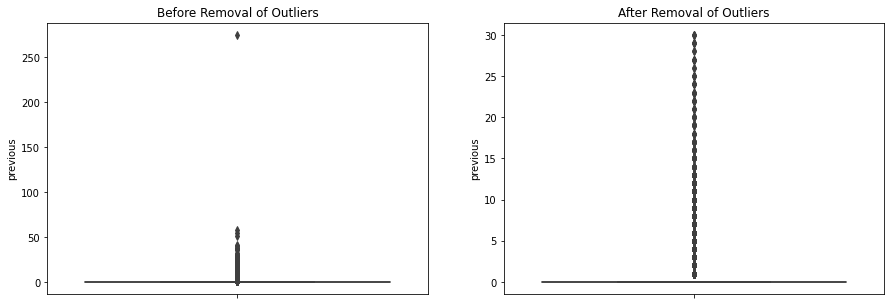

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="previous")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="previous")
p.set_title('After Removal of Outliers')

In [101]:
bank_df.shape

(44989, 21)

## **5.Handling Outliers In Feature pdays**

Text(0.5, 1.0, ' Success of Previous Subscription')

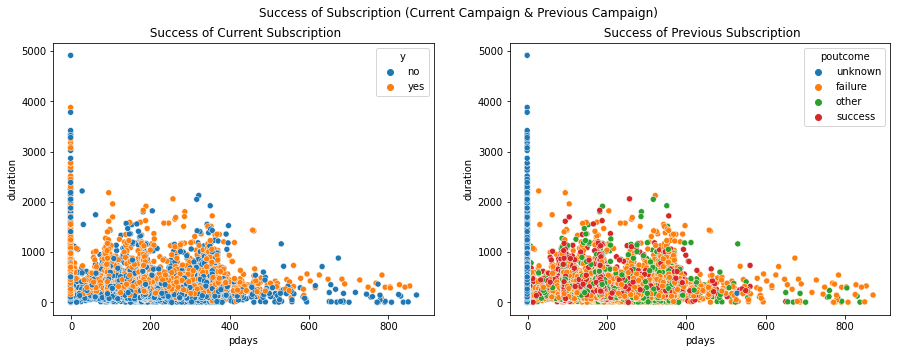

In [102]:
# Corelation Between pdays & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['pdays'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['pdays'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

Text(0.5, 1.0, 'After Removal of Outliers')

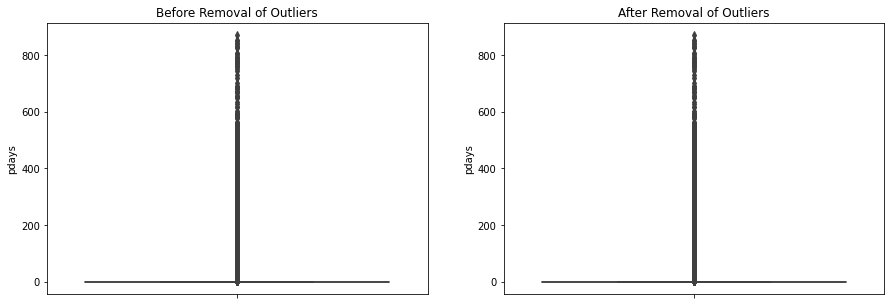

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="pdays")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="pdays")
p.set_title('After Removal of Outliers')

## **6.Handling Outliers In Feature day**

Text(0.5, 1.0, ' Success of Previous Subscription')

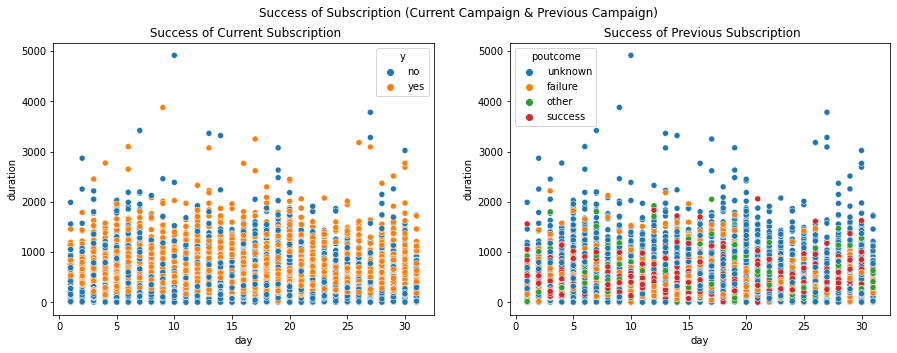

In [104]:
# Corelation Between day & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['day'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['day'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [105]:
# Lets Cap Outliers @ previous 30
bank_df = bank_df[bank_df.duration <= 4000]

In [106]:
bank_df.shape

(44988, 21)

# **So Consistaly we have seen for all features there is not any subscription of our plan even in Current Campaign as well as for previous campaign  where call duration is more than 4000 seconds so thats why capping outliers where call duration is beyond 4000 seconds.**

In [107]:
# find Numerical variables
numerical = [var for var in bank_df2.columns if bank_df2[var].dtype =='int']
print('There are {} numerical variables'.format(len(numerical)))
numerical

There are 8 numerical variables


['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'Outcome_y']

# **Distubution Plot and Box Plot After Removal of outliers**

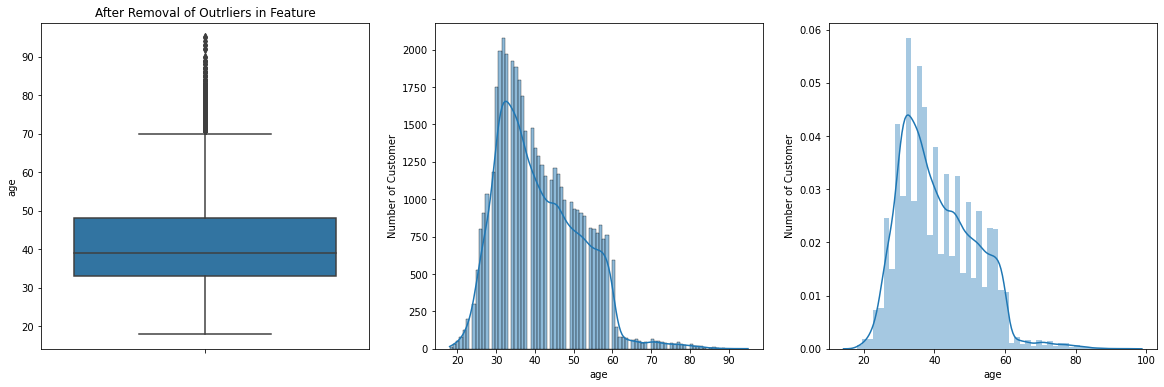

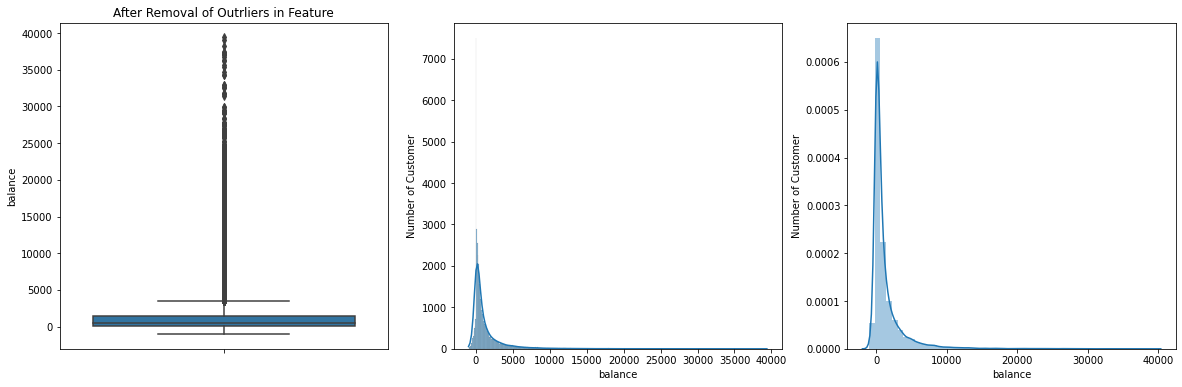

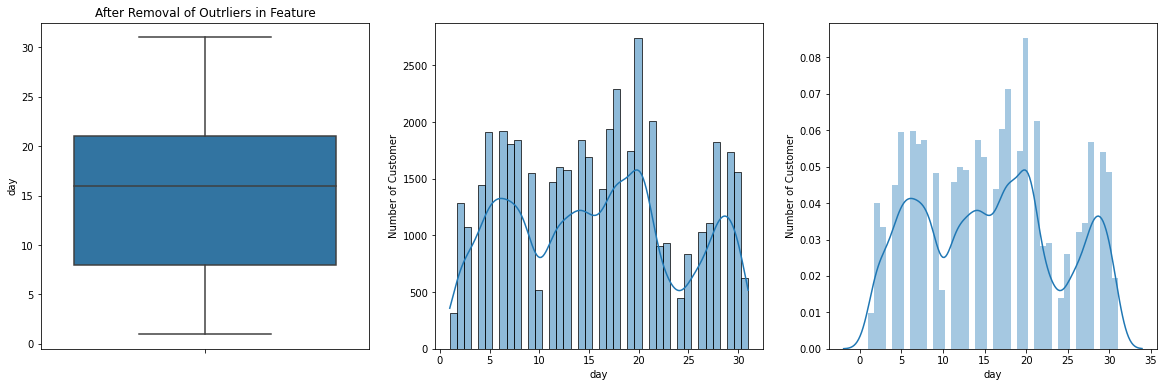

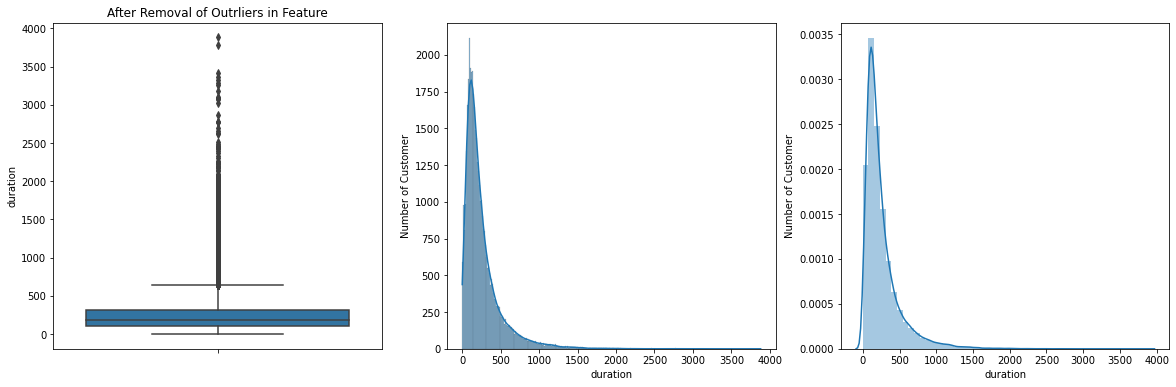

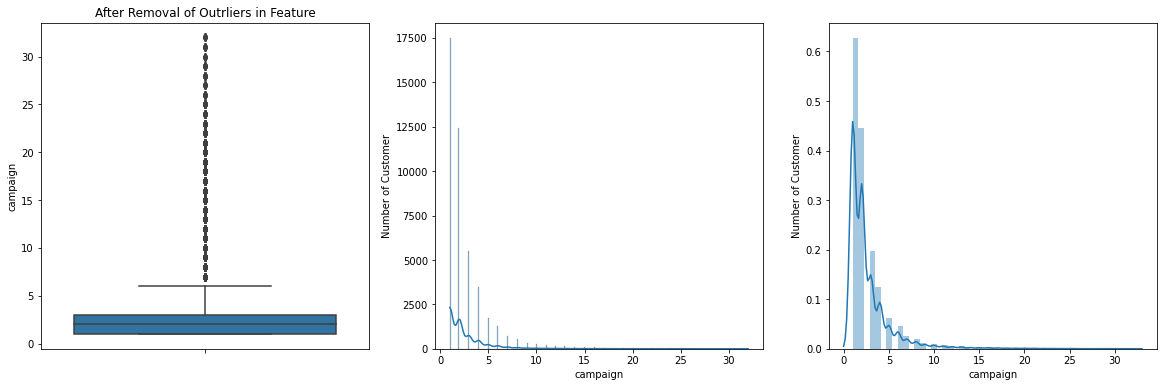

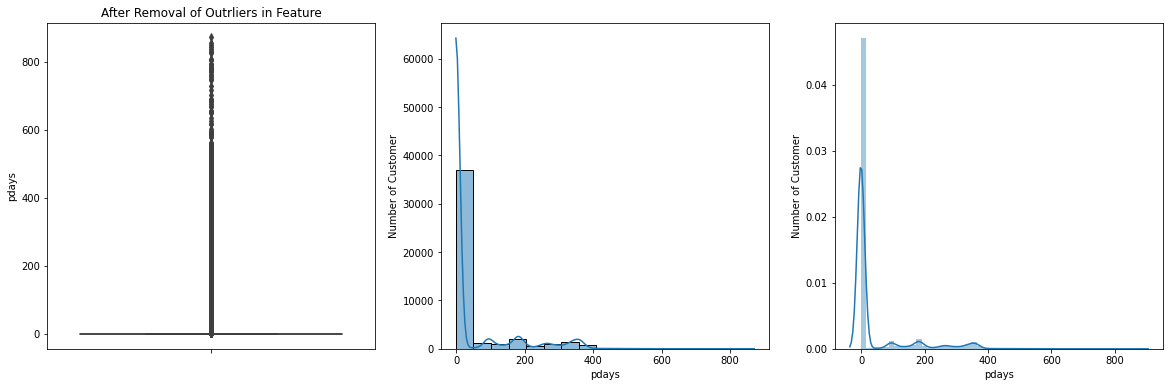

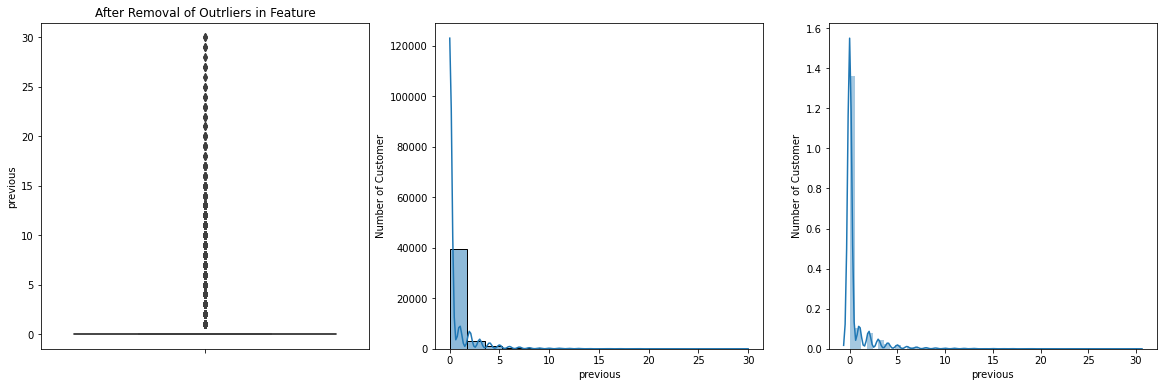

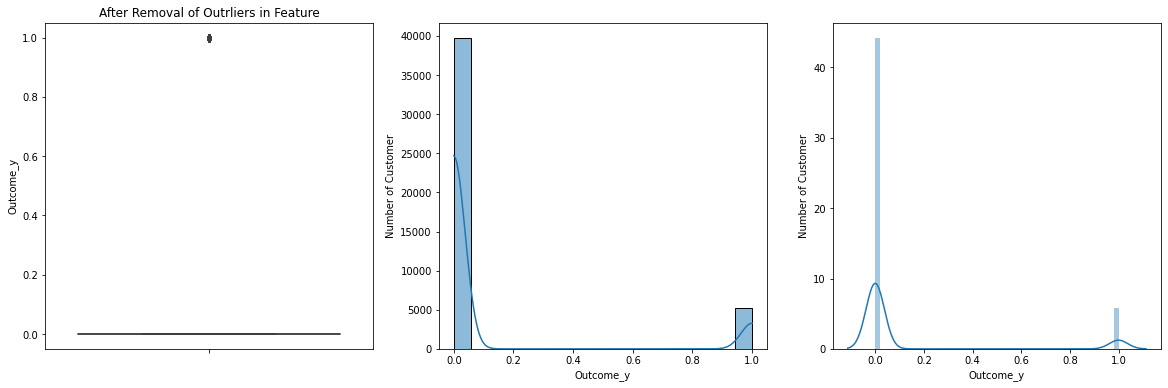

In [108]:
for var in numerical:
    plt.figure(figsize=(20,6))
    plt.subplot(1, 3, 1)
    fig = sns.boxplot(y=bank_df[var])
    fig.set_title('After Removal of Outrliers in Feature')
    fig.set_ylabel(var)
    
    plt.subplot(1, 3, 2)
    fig=sns.histplot( x=bank_df[var],kde=True)
    fig.set_ylabel('Number of Customer')
    fig.set_xlabel(var)

    plt.subplot(1, 3, 3)
    fig = sns.distplot(bank_df[var])
    # sns.distplot((data_train['GrLivArea']+1).transform(np.log), fit=norm);
    # fig = plt.figure()
    fig.set_ylabel('Number of Customer')
    fig.set_xlabel(var)
    plt.show()

# **Feature Engineering**

# **1.Creation of New Feature by Lable Encoding & One hot Encoding**

In [109]:
bank_df.describe(include = 'all')

age          job Age_Group  marital  education default  \
count   44988.000000        44988     44988    44988      44988   44988   
unique           NaN           12         4        3          4       2   
top              NaN  blue-collar     Adult  married  secondary      no   
freq             NaN         9700     28782    27058      23101   44223   
mean       40.925714          NaN       NaN      NaN        NaN     NaN   
std        10.620082          NaN       NaN      NaN        NaN     NaN   
min        18.000000          NaN       NaN      NaN        NaN     NaN   
25%        33.000000          NaN       NaN      NaN        NaN     NaN   
50%        39.000000          NaN       NaN      NaN        NaN     NaN   
75%        48.000000          NaN       NaN      NaN        NaN     NaN   
max        95.000000          NaN       NaN      NaN        NaN     NaN   

             balance bal_Group housing   loan  ...           day  month  \
count   44988.000000     44988   44988  44988  ...  44988.000000  44988   
unique           NaN         5       2      2  ...           NaN     12   
top              NaN     0to5k     yes     no  ...           NaN    may   
freq             NaN     35051   24968  37826  ...           NaN  13700   
mean     1336.774251       NaN     NaN    NaN  ...     15.795857    NaN   
std      2671.051595       NaN     NaN    NaN  ...      8.317089    NaN   
min      -999.000000       NaN     NaN    NaN  ...      1.000000    NaN   
25%        75.000000       NaN     NaN    NaN  ...      8.000000    NaN   
50%       451.000000       NaN     NaN    NaN  ...     16.000000    NaN   
75%      1430.000000       NaN     NaN    NaN  ...     21.000000    NaN   
max     39385.000000       NaN     NaN    NaN  ...     31.000000    NaN   

            duration      campaign         pdays  LastCall_Group  \
count   44988.000000  44988.000000  44988.000000            8233   
unique           NaN           NaN           NaN               8   
top              NaN           NaN           NaN      2ndQuarter   
freq             NaN           NaN           NaN            2476   
mean      258.331088      2.730728     40.241442             NaN   
std       256.728040      2.896531    100.081915             NaN   
min         0.000000      1.000000     -1.000000             NaN   
25%       103.000000      1.000000     -1.000000             NaN   
50%       180.000000      2.000000     -1.000000             NaN   
75%       319.000000      3.000000     -1.000000             NaN   
max      3881.000000     32.000000    871.000000             NaN   

            previous  poutcome      y     Outcome_y  
count   44988.000000     44988  44988  44988.000000  
unique           NaN         4      2           NaN  
top              NaN   unknown     no           NaN  
freq             NaN     36760  39711           NaN  
mean        0.565884       NaN    NaN      0.117298  
std         1.792413       NaN    NaN      0.321779  
min         0.000000       NaN    NaN      0.000000  
25%         0.000000       NaN    NaN      0.000000  
50%         0.000000       NaN    NaN      0.000000  
75%         0.000000       NaN    NaN      0.000000  
max        30.000000       NaN    NaN      1.000000  

[11 rows x 21 columns]

**I. First Lets Convert Categorical Fetaure which are having two class output (Yes/No) into Neumarical Feaures because Machine Learning Algorithem Only Accept Neumarical Features.**

In [110]:
bank_df.drop(['y','LastCall_Group'], axis = 1, inplace =True)

In [111]:
bank_df['default'] = (bank_df['default']=='yes').astype(int)
bank_df['housing'] = (bank_df['housing']=='yes').astype(int)
bank_df['loan'] = (bank_df['loan']=='yes').astype(int)
bank_df.head()

age           job     Age_Group  marital  education  default  balance  \
0   58    management  Upper_Middle  married   tertiary        0     2143   
1   44    technician         Adult   single  secondary        0       29   
2   33  entrepreneur         Adult  married  secondary        0        2   
3   47   blue-collar         Adult  married    unknown        0     1506   
4   33       unknown         Adult   single    unknown        0        1   

  bal_Group  housing  loan  contact  day month  duration  campaign  pdays  \
0     0to5k        1     0  unknown    5   may       261         1     -1   
1     0to5k        1     0  unknown    5   may       151         1     -1   
2     0to5k        1     1  unknown    5   may        76         1     -1   
3     0to5k        1     0  unknown    5   may        92         1     -1   
4     0to5k        0     0  unknown    5   may       198         1     -1   

   previous poutcome  Outcome_y  
0         0  unknown          0  
1         0  unknown          0  
2         0  unknown          0  
3         0  unknown          0  
4         0  unknown          0

**II. Now Lets Convert Remaining Categorical Fetaure into Neumarical Feaures because Machine Learning Algorithem Only Accept Neumarical Features.**

In [112]:
# find categorical variables
categorical = [var for var in bank_df.columns if bank_df[var].dtype !='int']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 8 categorical variables


['job',
 'Age_Group',
 'marital',
 'education',
 'bal_Group',
 'contact',
 'month',
 'poutcome']

In [113]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
#This may be a problem for some machine learning models.
for var in categorical:
  print('--'*50)
  print(var, ' contains ', bank_df[var].unique(), ' labels')
  print(var, ' contains ', len(bank_df[var].unique()), ' labels')

----------------------------------------------------------------------------------------------------
job  contains  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']  labels
job  contains  12  labels
----------------------------------------------------------------------------------------------------
Age_Group  contains  ['Upper_Middle', 'Adult', 'young', 'Elderly']
Categories (4, object): ['young' < 'Adult' < 'Upper_Middle' < 'Elderly']  labels
Age_Group  contains  4  labels
----------------------------------------------------------------------------------------------------
marital  contains  ['married' 'single' 'divorced']  labels
marital  contains  3  labels
----------------------------------------------------------------------------------------------------
education  contains  ['tertiary' 'secondary' 'unknown' 'primary']  labels
education  contains  4  labels
-------------------------

**III. Lets Use One hot Encoding to create Dummy Variable of following Multiclass Features from the Data.**

In [114]:
#Creation of Dummy Feature By One hot Encoding
bank_df = pd.get_dummies(bank_df, columns = ['job','marital','education','contact', 'poutcome'],prefix=['job','marital','education','contact', 'poutcome'])

IV. Lets Use lable Encoding to Convert Month Feature into Numarical Feature

In [115]:
# Lets map the month Feature into Numarical feature
bank_df['Month'] = bank_df['month'].map({'dec':0,'mar':1,'sep':2,'oct':3,'jan':4,'feb':5,'apr':6,'nov':7,'jun':8,'aug':9,'jul':10,'may':11})


In [116]:
# Lets Drop the Other Variable which we have converted into Numarical Features
bank_df.drop(['Age_Group','bal_Group','month'],axis= 1, inplace = True)

In [117]:
bank_df.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  ...  education_tertiary  education_unknown  contact_cellular  \
0         0  ...                   1                  0                 0   
1         0  ...                   0                  0                 0   
2         0  ...                   0                  0                 0   
3         0  ...                   0                  1                 0   
4         0  ...                   0                  1                 0   

   contact_telephone  contact_unknown  poutcome_failure  poutcome_other  \
0                  0                1                 0               0   
1                  0                1                 0               0   
2                  0                1                 0               0   
3                  0                1                 0               0   
4                  0                1                 0               0   

   poutcome_success  poutcome_unknown  Month  
0                 0                 1     11  
1                 0                 1     11  
2                 0                 1     11  
3                 0                 1     11  
4                 0                 1     11  

[5 rows x 38 columns]

In [118]:
bank_df['y']=bank_df['Outcome_y']

In [119]:
# Lets Drop the Other Variable which we have converted into Numarical Features
bank_df.drop('Outcome_y',axis= 1, inplace = True)

In [120]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44988 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44988 non-null  int64
 1   default              44988 non-null  int64
 2   balance              44988 non-null  int64
 3   housing              44988 non-null  int64
 4   loan                 44988 non-null  int64
 5   day                  44988 non-null  int64
 6   duration             44988 non-null  int64
 7   campaign             44988 non-null  int64
 8   pdays                44988 non-null  int64
 9   previous             44988 non-null  int64
 10  job_admin.           44988 non-null  uint8
 11  job_blue-collar      44988 non-null  uint8
 12  job_entrepreneur     44988 non-null  uint8
 13  job_housemaid        44988 non-null  uint8
 14  job_management       44988 non-null  uint8
 15  job_retired          44988 non-null  uint8
 16  job_self-employed    4

In [121]:
bank_df.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
Month                  0
y                      0
dtype: int64

## **So Now our dataset is having no null or any missing value and all Numarical Features So now lets check the corelation between the different Features aandf then select dependant & Indepedent features Accordingaly.**

# **Dealing with Data Imbalance**

In [122]:
bank_df.y.value_counts()

0    39711
1     5277
Name: y, dtype: int64

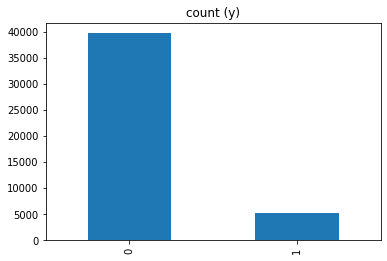

In [123]:
bank_df.y.value_counts().plot(kind='bar', title='count (y)')

## **So Dependent Variable is having issue of class imbalance so if we use such data for implementation of our model then it will be having tendency to lean towards majority Class and it may predict our data wrongely so thats why let balnce classes before implementing it on Machine learning Models.**

In [124]:
new_df= bank_df.copy()

# **Lets Normalize dataset**

In [125]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = new_df.columns
d = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  0.519481      0.0  0.077803      1.0   0.0  0.133333  0.067251       0.0   
1  0.337662      0.0  0.025456      1.0   0.0  0.133333  0.038907       0.0   
2  0.194805      0.0  0.024787      1.0   1.0  0.133333  0.019583       0.0   
3  0.376623      0.0  0.062030      1.0   0.0  0.133333  0.023705       0.0   
4  0.194805      0.0  0.024762      0.0   0.0  0.133333  0.051018       0.0   

   pdays  previous  ...  education_unknown  contact_cellular  \
0    0.0       0.0  ...                0.0               0.0   
1    0.0       0.0  ...                0.0               0.0   
2    0.0       0.0  ...                0.0               0.0   
3    0.0       0.0  ...                1.0               0.0   
4    0.0       0.0  ...                1.0               0.0   

   contact_telephone  contact_unknown  poutcome_failure  poutcome_other  \
0                0.0              1.0               0.0             0.0   
1                0.0              1.0               0.0             0.0   
2                0.0              1.0               0.0             0.0   
3                0.0              1.0               0.0             0.0   
4                0.0              1.0               0.0             0.0   

   poutcome_success  poutcome_unknown  Month    y  
0               0.0               1.0    1.0  0.0  
1               0.0               1.0    1.0  0.0  
2               0.0               1.0    1.0  0.0  
3               0.0               1.0    1.0  0.0  
4               0.0               1.0    1.0  0.0  

[5 rows x 38 columns]

# **Synthetic Minority Oversampling Technique (SMOTE)**

In [126]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(scaled_df.iloc[:,0:-1], scaled_df['y'])

print('Original dataset shape', len(scaled_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 44988
Resampled dataset shape 79422


In [127]:
# So now class is balanced
y_smote.value_counts()

0.0    39711
1.0    39711
Name: y, dtype: int64

In [128]:
x_smote.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  0.519481      0.0  0.077803      1.0   0.0  0.133333  0.067251       0.0   
1  0.337662      0.0  0.025456      1.0   0.0  0.133333  0.038907       0.0   
2  0.194805      0.0  0.024787      1.0   1.0  0.133333  0.019583       0.0   
3  0.376623      0.0  0.062030      1.0   0.0  0.133333  0.023705       0.0   
4  0.194805      0.0  0.024762      0.0   0.0  0.133333  0.051018       0.0   

   pdays  previous  ...  education_tertiary  education_unknown  \
0    0.0       0.0  ...                 1.0                0.0   
1    0.0       0.0  ...                 0.0                0.0   
2    0.0       0.0  ...                 0.0                0.0   
3    0.0       0.0  ...                 0.0                1.0   
4    0.0       0.0  ...                 0.0                1.0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0               0.0                0.0              1.0               0.0   
1               0.0                0.0              1.0               0.0   
2               0.0                0.0              1.0               0.0   
3               0.0                0.0              1.0               0.0   
4               0.0                0.0              1.0               0.0   

   poutcome_other  poutcome_success  poutcome_unknown  Month  
0             0.0               0.0               1.0    1.0  
1             0.0               0.0               1.0    1.0  
2             0.0               0.0               1.0    1.0  
3             0.0               0.0               1.0    1.0  
4             0.0               0.0               1.0    1.0  

[5 rows x 37 columns]


# **Finding correlation in variables (both dependent and independent**

# **CASE I**
# **I. With Duration Feature**

## **1. Lets Use Corelation Heatmap to check corelation between Features**

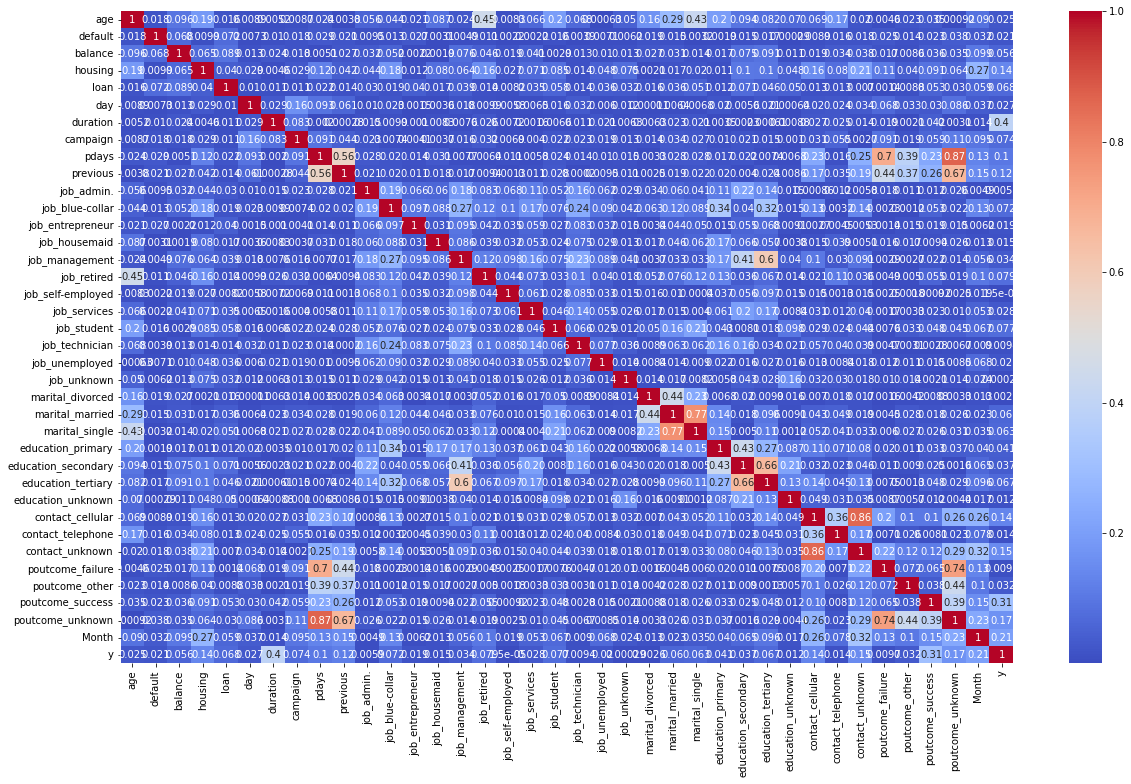

In [129]:
#Lets find Corelatrion ship between independent features and dependent features
plt.figure(figsize=(20,12))
correlation = bank_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

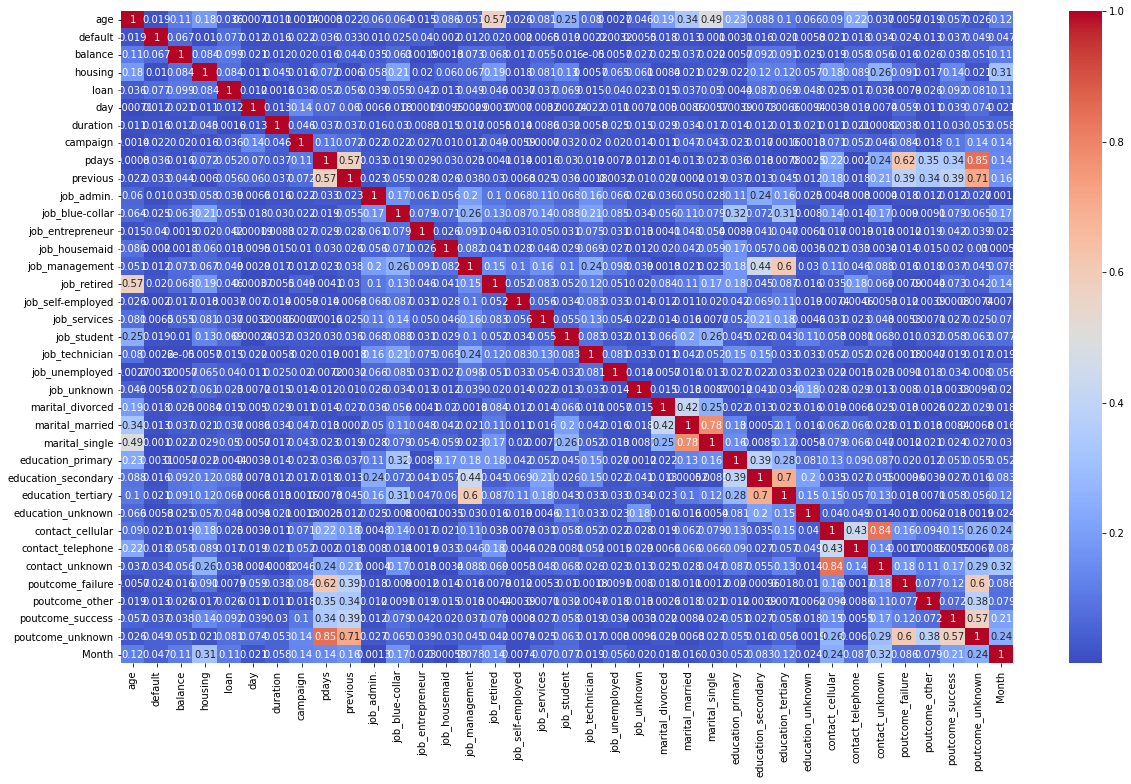

In [130]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = x_smote.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **So from above Corelarion Matrix we can get that some of the features are highely corelated with each other, So we have to reduce multicolinearity between independent features, So just before that lets find out Feature Importance of independent features then we can select independent features for model based on corelation matrix and feature importance.**

# **2. Feature importance**

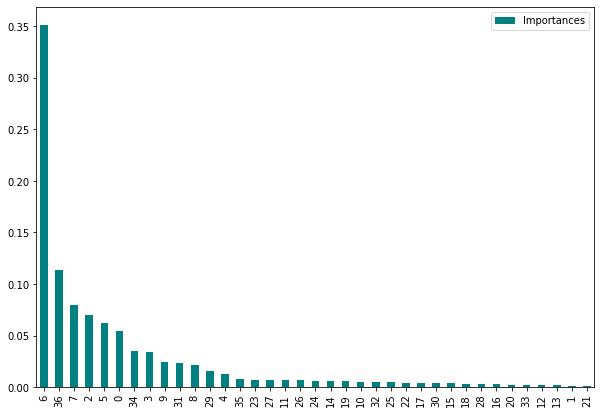

In [131]:

from sklearn.ensemble import RandomForestClassifier
  # Create the random forest eith hyperparameters
model= RandomForestClassifier(n_estimators=340)
  # Fit the mmodel
model.fit(x_smote, y_smote)
  # get the importance of thr resulting features
importances= model.feature_importances_
  # Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(x_smote).columns, "Importances": importances})
final_df.set_index('Importances')
  # Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances',ascending= False)
  # Plot the feature importances in bars
final_df.plot.bar(color='teal',figsize=(10,7))

In [132]:
# Feature Importance of the Independent Features
final_df

Features  Importances
6              duration     0.351563
36                Month     0.113155
7              campaign     0.079271
2               balance     0.070003
5                   day     0.061841
0                   age     0.054742
34     poutcome_success     0.035045
3               housing     0.034075
9              previous     0.024626
31      contact_unknown     0.023597
8                 pdays     0.021123
29     contact_cellular     0.015141
4                  loan     0.012498
35     poutcome_unknown     0.008166
23      marital_married     0.006903
27   education_tertiary     0.006815
11      job_blue-collar     0.006636
26  education_secondary     0.006435
24       marital_single     0.006057
14       job_management     0.005998
19       job_technician     0.005939
10           job_admin.     0.005273
32     poutcome_failure     0.004990
25    education_primary     0.004603
22     marital_divorced     0.004028
17         job_services     0.003965
30    contact_telephone     0.003808
15          job_retired     0.003624
18          job_student     0.003072
28    education_unknown     0.003044
16    job_self-employed     0.002653
20       job_unemployed     0.002437
33       poutcome_other     0.002408
12     job_entrepreneur     0.002357
13        job_housemaid     0.002010
1               default     0.001365
21          job_unknown     0.000729

## **Now Lets Select The Features which are having Feature Importance with respective Dependent Feature greter than 0.01 for implementing Machine Learning Model**

In [133]:
new_df =x_smote[final_df[final_df.Importances>0.01].Features.to_list()]

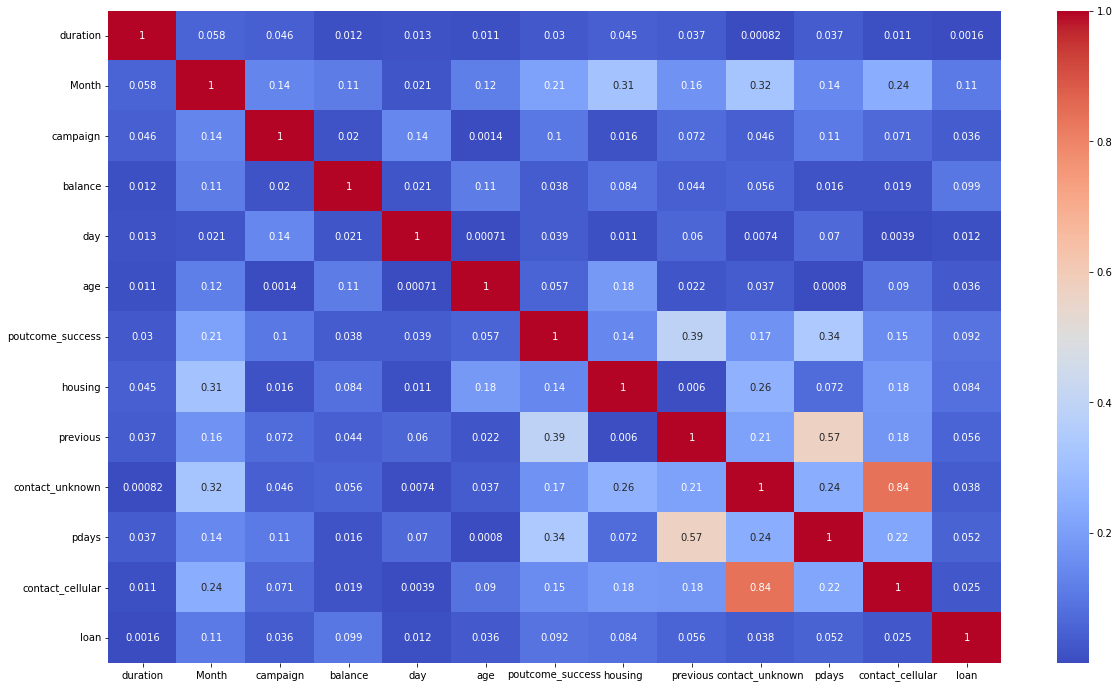

In [134]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **So now lets drop highely corelated feature which are having corelation more than 0.4 in order to avoid Multicolinearity between the features by considering the Feature Importance of the respective features.**

In [135]:
new_df.drop (['contact_cellular','pdays'],axis =1 , inplace = True)

In [136]:
independent_variables= new_df.columns.to_list()
print(f'independent_variables are {independent_variables}')

dependent_variables = 'y'
print(f'independent_variables are {dependent_variables}')

independent_variables are ['duration', 'Month', 'campaign', 'balance', 'day', 'age', 'poutcome_success', 'housing', 'previous', 'contact_unknown', 'loan']
independent_variables are y


In [137]:
# Creating the dataset with all independent variables
X = x_smote[independent_variables]

# Creating the dataset with the dependent variable
Y = y_smote

In [138]:
print(X.shape,Y.shape)

(79422, 11) (79422,)


In [139]:
#Lets Split The dataset Into Test & Train dataset
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0,stratify= Y)

In [140]:

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# **1. RandomForestClassifier**

In [146]:
# Hyperparameter tuning for Random Forest Classifier
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50,100,300,500], 'max_depth':[5, 7,10]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [50, 100, 300, 500]},
             scoring='roc_auc')

In [159]:
classifier.best_score_

0.9703906929635833

In [160]:
classifier.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [161]:
y_pred  =  classifier.predict(X_test)
y_pred_train  =  classifier.predict(X_train)

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')


Accuracy Score for Test Data is 0.9000302175664786
Accuracy Score for Train Data is 0.9169492663600041


In [163]:

print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.9000302175664787
roc_auc_score Score for Train Data is 0.9169492663600041


In [164]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8520 1408]
 [ 577 9351]]
confusion_matrix  for Train Data is
[[26187  3596]
 [ 1351 28432]]


In [165]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve

In [166]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91     29783
         1.0       0.89      0.95      0.92     29783

    accuracy                           0.92     59566
   macro avg       0.92      0.92      0.92     59566
weighted avg       0.92      0.92      0.92     59566



              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      9928
         1.0       0.87      0.94      0.90      9928

    accuracy                           0.90     19856
   macro avg       0.90      0.90      0.90     19856
weighted avg       0.90      0.90      0.90     19856



In [ ]:
from sklearn import metrics

In [ ]:
# # Plot Precision Recall Curve For Test & TRain data
# metrics.plot_precision_recall_curve(classifier,X_test.toarray(), y_test)

In [ ]:
 # PLot roc_curve For F Test & TRain data
# metrics.plot_roc_curve(classifier, X_train.toarray(), y_train) 
# plt.show()

# **2.Naive Bayes Algorithm**

In [167]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [168]:
y_pred  =  classifier_nb.predict(X_test)
y_pred_train  =  classifier_nb.predict(X_train)

In [169]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.7824838839645447
Accuracy Score for Train Data is 0.7849444313870328


In [170]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.7824838839645447
roc_auc_score Score for Train Data is 0.7849444313870328


In [171]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8497 1431]
 [2888 7040]]
confusion_matrix  for Train Data is
[[25586  4197]
 [ 8613 21170]]


In [172]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80     29783
         1.0       0.83      0.71      0.77     29783

    accuracy                           0.78     59566
   macro avg       0.79      0.78      0.78     59566
weighted avg       0.79      0.78      0.78     59566



              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      9928
         1.0       0.83      0.71      0.77      9928

    accuracy                           0.78     19856
   macro avg       0.79      0.78      0.78     19856
weighted avg       0.79      0.78      0.78     19856



# **3.Support vector classifier**

In [290]:
from sklearn.svm import SVC #Support vector classifier
from sklearn import datasets, metrics, model_selection, svm

In [291]:
# Lets Apply Support vector classifier along GridSearchCV for hyperparameter tuning
model = SVC( gamma ='scale')
params={'C':[ 1,5,10],
        'kernel' : ['linear', 'rbf', 'sigmoid']}
gs=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END ....................................C=1, kernel=rbf; total time= 2.7min
[CV] END ....................................C=1, kernel=rbf; total time= 2.7min
[CV] END ....................................C=1, kernel=rbf; total time= 2.7min
[CV] END ....................................C=1, kernel=rbf; total time= 2.7min
[CV] END ....................................C=1, kernel=rbf; total time= 2.6min
[CV] END ................................C=1, kernel=sigmoid; total time= 3.3min
[CV] END ................................C=1, ker

In [1]:
gs.best_params_

NameError: ignored

In [ ]:
gs.best_score_

0.8803679510652893

In [ ]:
y_pred  =  gs.predict(X_test)
y_pred_train  =  gs.predict(X_train)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.878928283642224
Accuracy Score for Train Data is 0.890541584125172


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.878928283642224
roc_auc_score Score for Train Data is 0.8905415841251721


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8408 1520]
 [ 884 9044]]
confusion_matrix  for Train Data is
[[25602  4181]
 [ 2339 27444]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89     29783
         1.0       0.87      0.92      0.89     29783

    accuracy                           0.89     59566
   macro avg       0.89      0.89      0.89     59566
weighted avg       0.89      0.89      0.89     59566



              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      9928
         1.0       0.86      0.91      0.88      9928

    accuracy                           0.88     19856
   macro avg       0.88      0.88      0.88     19856
weighted avg       0.88      0.88      0.88     19856



# **4.KNeighborsClassifier**

In [281]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
model= KNeighborsClassifier(metric = 'minkowski') 
params={'n_neighbors':[5,7,10],
        'weights':['uniform','distance'],
        'p': [1,2]}
classifier_knn=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2,n_jobs =-1) 

In [282]:
classifier_knn.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [283]:
classifier_knn.best_score_

0.8556558945815841

In [284]:
classifier_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [285]:
y_pred_train  =  classifier_knn.predict(X_train)
y_pred  =  classifier_knn.predict(X_test)

In [286]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.8655318291700241
Accuracy Score for Train Data is 0.9999832118994058


In [287]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.8655318291700242
roc_auc_score Score for Train Data is 0.9999832118994056


In [288]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8366 1562]
 [1108 8820]]
confusion_matrix  for Train Data is
[[29783     0]
 [    1 29782]]


In [289]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29783
         1.0       1.00      1.00      1.00     29783

    accuracy                           1.00     59566
   macro avg       1.00      1.00      1.00     59566
weighted avg       1.00      1.00      1.00     59566



              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      9928
         1.0       0.85      0.89      0.87      9928

    accuracy                           0.87     19856
   macro avg       0.87      0.87      0.87     19856
weighted avg       0.87      0.87      0.87     19856



# **5.Sequential Neural Networks.**

In [180]:
!pip install adam

In [181]:
!pip install keras

In [184]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
model = Sequential()
model.add(Dense(11, input_dim=11, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
    
    # compile model
# adam = adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [185]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 5)                 60        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198
Trainable params: 198
Non-trainable params: 0
_________________________________________________________________


In [186]:
model_history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=500, verbose=2)

Epoch 1/500
1862/1862 - 7s - loss: 0.6261 - accuracy: 0.6756 - val_loss: 0.5509 - val_accuracy: 0.7223 - 7s/epoch - 4ms/step
Epoch 2/500
1862/1862 - 5s - loss: 0.4940 - accuracy: 0.7757 - val_loss: 0.4390 - val_accuracy: 0.8213 - 5s/epoch - 3ms/step
Epoch 3/500
1862/1862 - 5s - loss: 0.4021 - accuracy: 0.8336 - val_loss: 0.3892 - val_accuracy: 0.8332 - 5s/epoch - 3ms/step
Epoch 4/500
1862/1862 - 4s - loss: 0.3741 - accuracy: 0.8415 - val_loss: 0.3773 - val_accuracy: 0.8360 - 4s/epoch - 2ms/step
Epoch 5/500
1862/1862 - 3s - loss: 0.3659 - accuracy: 0.8430 - val_loss: 0.3724 - val_accuracy: 0.8377 - 3s/epoch - 2ms/step
Epoch 6/500
1862/1862 - 5s - loss: 0.3622 - accuracy: 0.8446 - val_loss: 0.3701 - val_accuracy: 0.8396 - 5s/epoch - 2ms/step
Epoch 7/500
1862/1862 - 4s - loss: 0.3604 - accuracy: 0.8453 - val_loss: 0.3689 - val_accuracy: 0.8394 - 4s/epoch - 2ms/step
Epoch 8/500
1862/1862 - 3s - loss: 0.3594 - accuracy: 0.8454 - val_loss: 0.3681 - val_accuracy: 0.8396 - 3s/epoch - 2ms/step


In [192]:
y_pred_train=model.predict(X_train) > 0.5
y_pred=model.predict(X_test) >0.5

In [193]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.8609488315874295
Accuracy Score for Train Data is 0.8678776483228687


In [194]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.8609488315874295
roc_auc_score Score for Train Data is 0.867877648322869


In [195]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8004 1924]
 [ 837 9091]]
confusion_matrix  for Train Data is
[[24376  5407]
 [ 2463 27320]]


[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

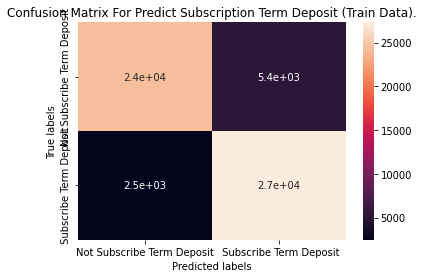

In [196]:
# Get the confusion matrix for both train Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_train,y_pred_train)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Train Data).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

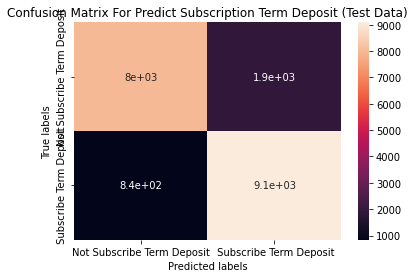

In [197]:
# Get the confusion matrix for both Test Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Test Data)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [198]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86     29783
         1.0       0.83      0.92      0.87     29783

    accuracy                           0.87     59566
   macro avg       0.87      0.87      0.87     59566
weighted avg       0.87      0.87      0.87     59566



              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85      9928
         1.0       0.83      0.92      0.87      9928

    accuracy                           0.86     19856
   macro avg       0.87      0.86      0.86     19856
weighted avg       0.87      0.86      0.86     19856



### **Visualizing the model performance**

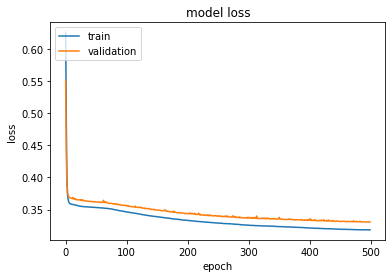

In [199]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

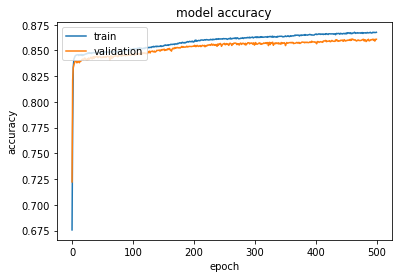

In [200]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Important note: Duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Also , the duration is not known before a call is performed. Also, after the end of the call y is obviously known so that why inorder to have Realistic Model Lets drop the duration Feature**. 

# **Thus, The Drop Duration feature inorder to have a realistic predictive Machine Learing Model**

# **CASE II. Without Considering Duration Variable**

In [201]:
x_smote.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  0.519481      0.0  0.077803      1.0   0.0  0.133333  0.067251       0.0   
1  0.337662      0.0  0.025456      1.0   0.0  0.133333  0.038907       0.0   
2  0.194805      0.0  0.024787      1.0   1.0  0.133333  0.019583       0.0   
3  0.376623      0.0  0.062030      1.0   0.0  0.133333  0.023705       0.0   
4  0.194805      0.0  0.024762      0.0   0.0  0.133333  0.051018       0.0   

   pdays  previous  ...  education_tertiary  education_unknown  \
0    0.0       0.0  ...                 1.0                0.0   
1    0.0       0.0  ...                 0.0                0.0   
2    0.0       0.0  ...                 0.0                0.0   
3    0.0       0.0  ...                 0.0                1.0   
4    0.0       0.0  ...                 0.0                1.0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0               0.0                0.0              1.0               0.0   
1               0.0                0.0              1.0               0.0   
2               0.0                0.0              1.0               0.0   
3               0.0                0.0              1.0               0.0   
4               0.0                0.0              1.0               0.0   

   poutcome_other  poutcome_success  poutcome_unknown  Month  
0             0.0               0.0               1.0    1.0  
1             0.0               0.0               1.0    1.0  
2             0.0               0.0               1.0    1.0  
3             0.0               0.0               1.0    1.0  
4             0.0               0.0               1.0    1.0  

[5 rows x 37 columns]

In [202]:
x_smote.drop('duration', axis = 1, inplace = True)

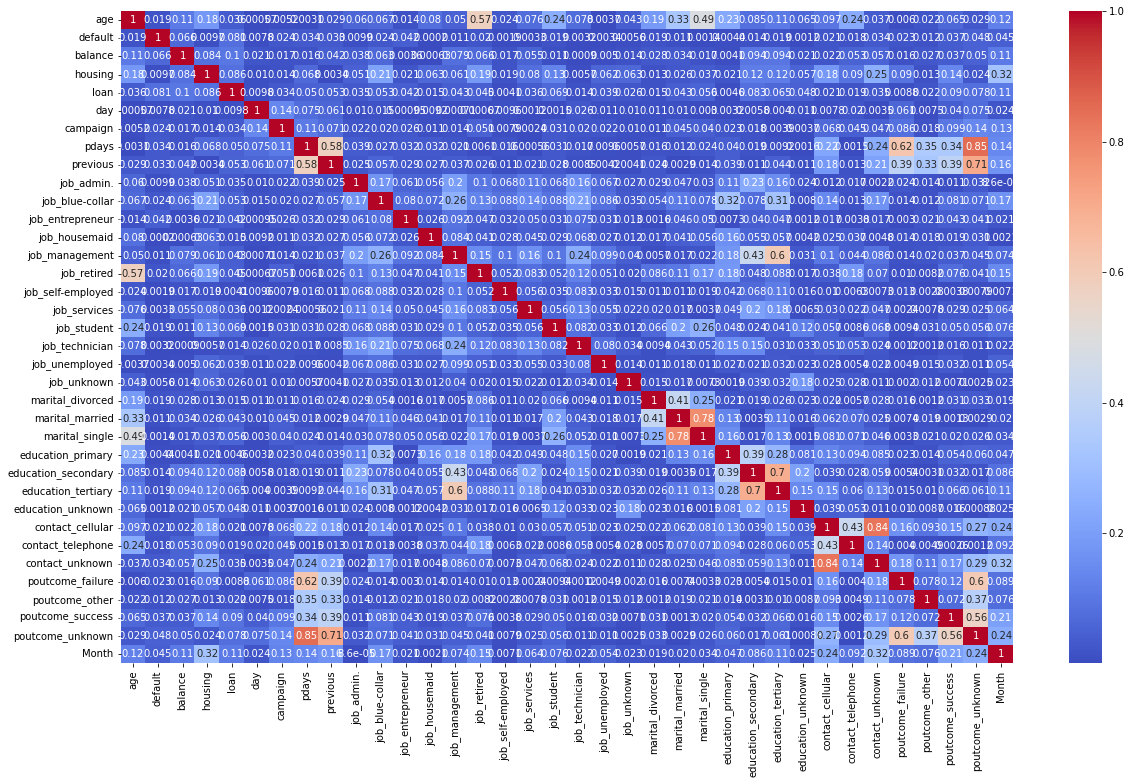

In [203]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = x_smote.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **So from above Corelarion Matrix we can get that some of the features are highely corelated with each other, So we have to reduce multicolinearity between independent features, So just before that lets find out Feature Importance of independent features then we can select independent features for model based on corelation matrix and feature importance.**

# **2. Feature importance**

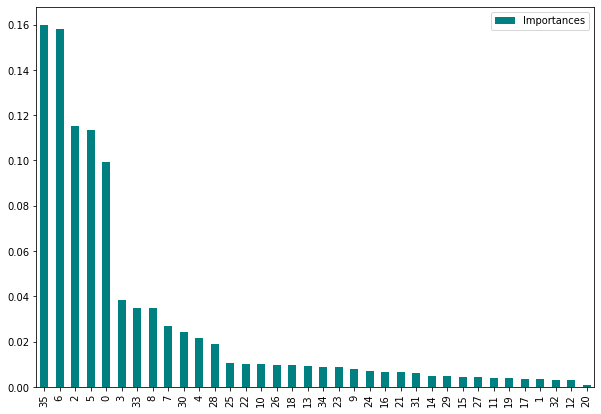

In [204]:

from sklearn.ensemble import RandomForestClassifier
  # Create the random forest eith hyperparameters
model= RandomForestClassifier(n_estimators=340)
  # Fit the mmodel
model.fit(x_smote, y_smote)
  # get the importance of thr resulting features
importances= model.feature_importances_
  # Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(x_smote).columns, "Importances": importances})
final_df.set_index('Importances')
  # Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances',ascending= False)
  # Plot the feature importances in bars
final_df.plot.bar(color='teal',figsize=(10,7))

In [205]:
# Feature Importance of the Independent Features
final_df

Features  Importances
35                Month     0.159944
6              campaign     0.158123
2               balance     0.115065
5                   day     0.113667
0                   age     0.099491
3               housing     0.038398
33     poutcome_success     0.035037
8              previous     0.034840
7                 pdays     0.026756
30      contact_unknown     0.024313
4                  loan     0.021484
28     contact_cellular     0.019189
25  education_secondary     0.010452
22      marital_married     0.010306
10      job_blue-collar     0.010127
26   education_tertiary     0.009739
18       job_technician     0.009545
13       job_management     0.009203
34     poutcome_unknown     0.009021
23       marital_single     0.008803
9            job_admin.     0.008176
24    education_primary     0.007200
16         job_services     0.006761
21     marital_divorced     0.006526
31     poutcome_failure     0.006191
14          job_retired     0.005080
29    contact_telephone     0.004818
15    job_self-employed     0.004612
27    education_unknown     0.004390
11     job_entrepreneur     0.004150
19       job_unemployed     0.004058
17          job_student     0.003650
1               default     0.003447
32       poutcome_other     0.003293
12        job_housemaid     0.003211
20          job_unknown     0.000932

In [206]:
final_df[final_df.Importances>0.01].Features.to_list()

['Month',
 'campaign',
 'balance',
 'day',
 'age',
 'housing',
 'poutcome_success',
 'previous',
 'pdays',
 'contact_unknown',
 'loan',
 'contact_cellular',
 'education_secondary',
 'marital_married',
 'job_blue-collar']

In [207]:
new_df =x_smote[final_df[final_df.Importances>0.01].Features.to_list()]


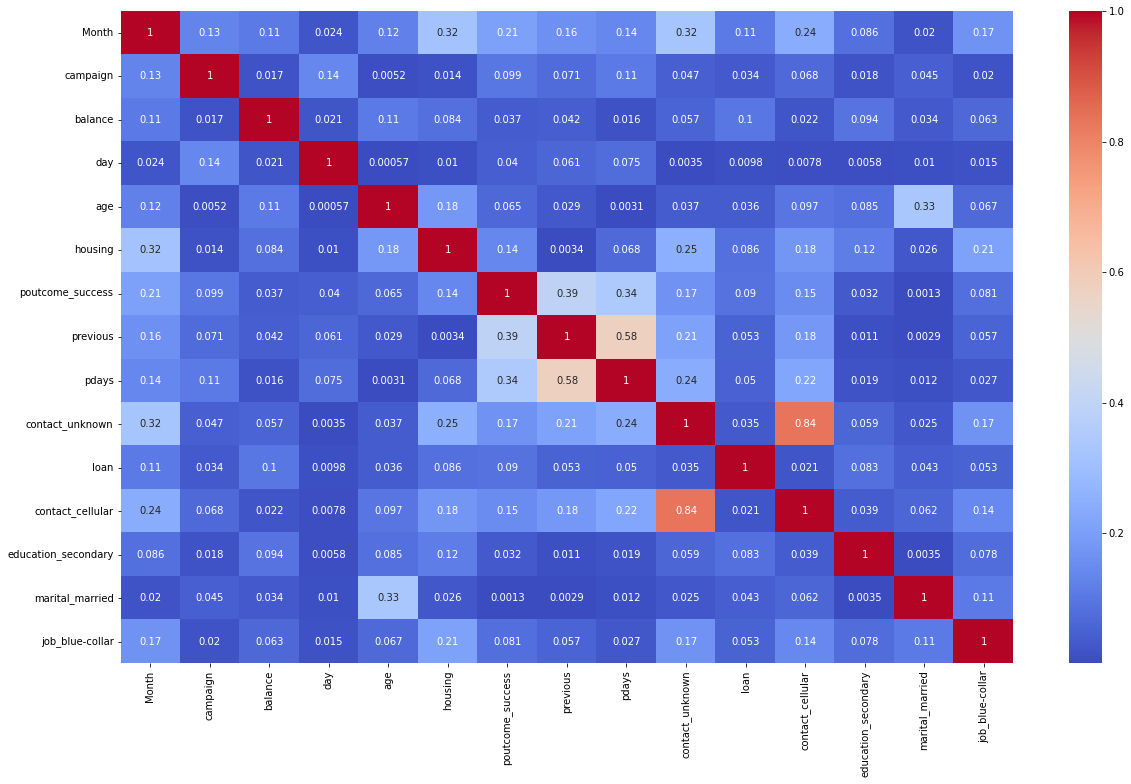

In [208]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **So now lets drop highely corelated feature which are having corelation more than 0.4 in order to avoid Multicolinearity between the features by considering the Feature Importance of the respective features.**

In [209]:
new_df.drop (['contact_cellular','pdays'],axis =1 , inplace = True)

## **Now Lets Select The Features which are having Feature Importance with respective Dependent Feature greter than 0.005 for implementing Machine Learning Model**

In [210]:
independent_variables= new_df.columns.to_list()
print(f'independent_variables are {independent_variables}')

dependent_variables = 'y'
print(f'independent_variables are {dependent_variables}')

independent_variables are ['Month', 'campaign', 'balance', 'day', 'age', 'housing', 'poutcome_success', 'previous', 'contact_unknown', 'loan', 'education_secondary', 'marital_married', 'job_blue-collar']
independent_variables are y


In [211]:
# Creating the dataset with all independent variables
X = x_smote[independent_variables]

# Creating the dataset with the dependent variable
Y = y_smote

In [212]:
print(X.shape,Y.shape)

(79422, 13) (79422,)


In [213]:
#Lets Split The dataset Into Test & Train dataset
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0,stratify= Y)

In [214]:

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# **1. RandomForestClassifier**

In [215]:
# Hyperparameter tuning for Random Forest Classifier
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[100, 300,500], 'max_depth':[5, 7,10]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [216]:
classifier.best_score_

0.9249752944202594

In [217]:
classifier.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [218]:
y_pred  =  classifier.predict(X_test)
y_pred_train  =  classifier.predict(X_train)

In [219]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')


Accuracy Score for Test Data is 0.8525886381950041
Accuracy Score for Train Data is 0.8606587650673203


In [220]:

print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.8525886381950041
roc_auc_score Score for Train Data is 0.8606587650673202


In [221]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8934  994]
 [1933 7995]]
confusion_matrix  for Train Data is
[[27083  2700]
 [ 5600 24183]]


In [222]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve

In [223]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     29783
         1.0       0.90      0.81      0.85     29783

    accuracy                           0.86     59566
   macro avg       0.86      0.86      0.86     59566
weighted avg       0.86      0.86      0.86     59566



              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      9928
         1.0       0.89      0.81      0.85      9928

    accuracy                           0.85     19856
   macro avg       0.86      0.85      0.85     19856
weighted avg       0.86      0.85      0.85     19856



In [ ]:
from sklearn import metrics

In [ ]:
# # Plot Precision Recall Curve For Test & TRain data
# metrics.plot_precision_recall_curve(classifier,X_test.toarray(), y_test)

In [ ]:
 # PLot roc_curve For F Test & TRain data
# metrics.plot_roc_curve(classifier, X_train.toarray(), y_train) 
# plt.show()

# **2.Naive Bayes Algorithm**

In [224]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)


GaussianNB()

In [225]:
y_pred  =  classifier_nb.predict(X_test)
y_pred_train  =  classifier_nb.predict(X_train)

In [226]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.6929391619661563
Accuracy Score for Train Data is 0.6910317966625256


In [227]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.6929391619661563
roc_auc_score Score for Train Data is 0.6910317966625257


In [228]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[7465 2463]
 [3634 6294]]
confusion_matrix  for Train Data is
[[22469  7314]
 [11090 18693]]


In [229]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71     29783
         1.0       0.72      0.63      0.67     29783

    accuracy                           0.69     59566
   macro avg       0.69      0.69      0.69     59566
weighted avg       0.69      0.69      0.69     59566



              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71      9928
         1.0       0.72      0.63      0.67      9928

    accuracy                           0.69     19856
   macro avg       0.70      0.69      0.69     19856
weighted avg       0.70      0.69      0.69     19856



# **3.Support vector classifier**

In [269]:
from sklearn.svm import SVC #Support vector classifier
from sklearn import datasets, metrics, model_selection, svm

In [272]:
# Lets Apply Support vector classifier along GridSearchCV for hyperparameter tuning
model = SVC( gamma ='scale')
params={'C':[ 1,5,10],
        'kernel' : ['linear', 'rbf', 'sigmoid']}
gs=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=1, kernel=linear; total time= 1.9min
[CV] END .................................C=1, kernel=linear; total time= 1.7min
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END .................................C=1, kernel=linear; total time= 1.7min
[CV] END ....................................C=1, kernel=rbf; total time= 2.7min
[CV] END ....................................C=1, kernel=rbf; total time= 2.6min
[CV] END ....................................C=1, kernel=rbf; total time= 2.7min
[CV] END ....................................C=1, kernel=rbf; total time= 2.6min
[CV] END ....................................C=1, kernel=rbf; total time= 2.6min
[CV] END ................................C=1, kernel=sigmoid; total time= 3.2min
[CV] END ................................C=1, ker

In [273]:
gs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [274]:
gs.best_score_

0.733606356622134

In [275]:
y_pred  =  gs.predict(X_test)
y_pred_train  =  gs.predict(X_train)

In [276]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.7325241740531829
Accuracy Score for Train Data is 0.7373333781016016


In [277]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.7325241740531829
roc_auc_score Score for Train Data is 0.7373333781016016


In [278]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[7761 2167]
 [3144 6784]]
confusion_matrix  for Train Data is
[[23582  6201]
 [ 9445 20338]]


In [279]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75     29783
         1.0       0.77      0.68      0.72     29783

    accuracy                           0.74     59566
   macro avg       0.74      0.74      0.74     59566
weighted avg       0.74      0.74      0.74     59566



              precision    recall  f1-score   support

         0.0       0.71      0.78      0.75      9928
         1.0       0.76      0.68      0.72      9928

    accuracy                           0.73     19856
   macro avg       0.73      0.73      0.73     19856
weighted avg       0.73      0.73      0.73     19856



# **4.KNeighborsClassifier**

In [246]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
model= KNeighborsClassifier(metric = 'minkowski') 
params={'n_neighbors':[5,7,10],
        'weights':['uniform','distance'],
        'p': [1,2]}
classifier_knn=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2,n_jobs =-1) 


In [247]:
classifier_knn.fit(X_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [248]:
classifier_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [249]:
classifier_knn.best_score_

0.8556558945815841

In [250]:
y_pred  =  classifier_knn.predict(X_test)
y_pred_train  =  classifier_knn.predict(X_train)

In [251]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.8655318291700241
Accuracy Score for Train Data is 0.9999832118994058


In [252]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.8655318291700242
roc_auc_score Score for Train Data is 0.9999832118994056


In [253]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8366 1562]
 [1108 8820]]
confusion_matrix  for Train Data is
[[29783     0]
 [    1 29782]]


In [254]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29783
         1.0       1.00      1.00      1.00     29783

    accuracy                           1.00     59566
   macro avg       1.00      1.00      1.00     59566
weighted avg       1.00      1.00      1.00     59566



              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      9928
         1.0       0.85      0.89      0.87      9928

    accuracy                           0.87     19856
   macro avg       0.87      0.87      0.87     19856
weighted avg       0.87      0.87      0.87     19856



# **5.Sequential Neural Networks.**

In [255]:
!pip install adam

In [256]:
!pip install keras

In [257]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
model = Sequential()
model.add(Dense(13, input_dim=13, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
    
    # compile model
# adam = adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [258]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 10)                140       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [259]:
model_history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=500, verbose=2)

Epoch 1/500
1862/1862 - 11s - loss: 0.6237 - accuracy: 0.6642 - val_loss: 0.5868 - val_accuracy: 0.6819 - 11s/epoch - 6ms/step
Epoch 2/500
1862/1862 - 7s - loss: 0.5859 - accuracy: 0.6875 - val_loss: 0.5814 - val_accuracy: 0.6904 - 7s/epoch - 3ms/step
Epoch 3/500
1862/1862 - 6s - loss: 0.5833 - accuracy: 0.6911 - val_loss: 0.5802 - val_accuracy: 0.6934 - 6s/epoch - 3ms/step
Epoch 4/500
1862/1862 - 7s - loss: 0.5824 - accuracy: 0.6912 - val_loss: 0.5798 - val_accuracy: 0.6930 - 7s/epoch - 4ms/step
Epoch 5/500
1862/1862 - 6s - loss: 0.5820 - accuracy: 0.6913 - val_loss: 0.5795 - val_accuracy: 0.6920 - 6s/epoch - 3ms/step
Epoch 6/500
1862/1862 - 5s - loss: 0.5814 - accuracy: 0.6911 - val_loss: 0.5800 - val_accuracy: 0.6893 - 5s/epoch - 3ms/step
Epoch 7/500
1862/1862 - 4s - loss: 0.5811 - accuracy: 0.6908 - val_loss: 0.5787 - val_accuracy: 0.6940 - 4s/epoch - 2ms/step
Epoch 8/500
1862/1862 - 4s - loss: 0.5808 - accuracy: 0.6914 - val_loss: 0.5788 - val_accuracy: 0.6922 - 4s/epoch - 2ms/ste

In [260]:
y_pred_train=model.predict(X_train)>0.5
y_pred=model.predict(X_test)>0.5

In [261]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.7255237711522965
Accuracy Score for Train Data is 0.7302823758519961


In [262]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.7255237711522965
roc_auc_score Score for Train Data is 0.7302823758519961


In [263]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[7315 2613]
 [2837 7091]]
confusion_matrix  for Train Data is
[[22140  7643]
 [ 8423 21360]]


[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

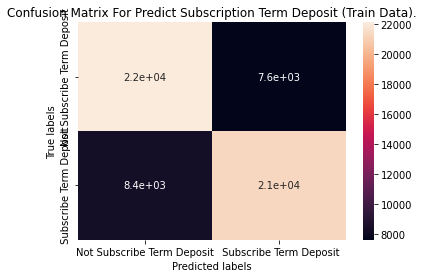

In [264]:
# Get the confusion matrix for both train Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_train,y_pred_train)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Train Data).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

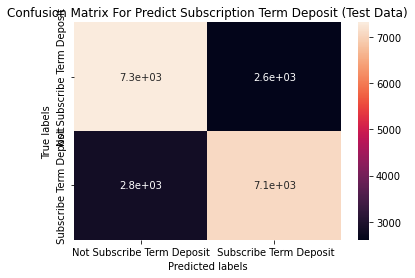

In [265]:
# Get the confusion matrix for both Test Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Test Data)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [266]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73     29783
         1.0       0.74      0.72      0.73     29783

    accuracy                           0.73     59566
   macro avg       0.73      0.73      0.73     59566
weighted avg       0.73      0.73      0.73     59566



              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      9928
         1.0       0.73      0.71      0.72      9928

    accuracy                           0.73     19856
   macro avg       0.73      0.73      0.73     19856
weighted avg       0.73      0.73      0.73     19856



### **Visualizing the model performance**

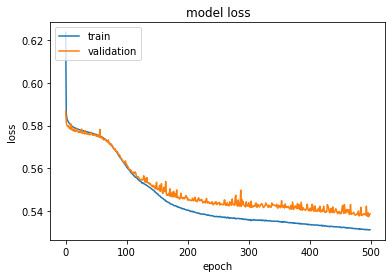

In [267]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

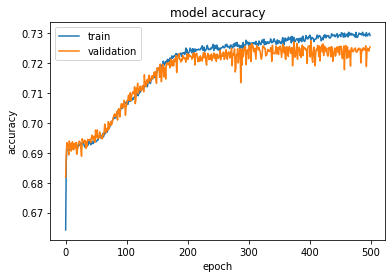

In [268]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Conclusion**